___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from ipywidgets import interact
# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, Normalizer, StandardScaler, MinMaxScaler
plt.rcParams["figure.figsize"] = (10, 6)
from sklearn.compose import make_column_transformer
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
from sklearn.model_selection import train_test_split
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam,Adadelta, RMSprop, Nadam
from tensorflow.keras.layers import Dropout
import optuna
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import recall_score

In [2]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.shape

(10000, 14)

the following table shows that : 
- there is no missing values 
- we could have some outliers but we will see that later on 


In [5]:
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

- we can see that there is some object variable that we need to encode before training, also there is no missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- as we see the class 0 has a much more values than 1 , so we need to deal with this imbalance data

[Text(0, 0, '7963'), Text(0, 0, '2037')]

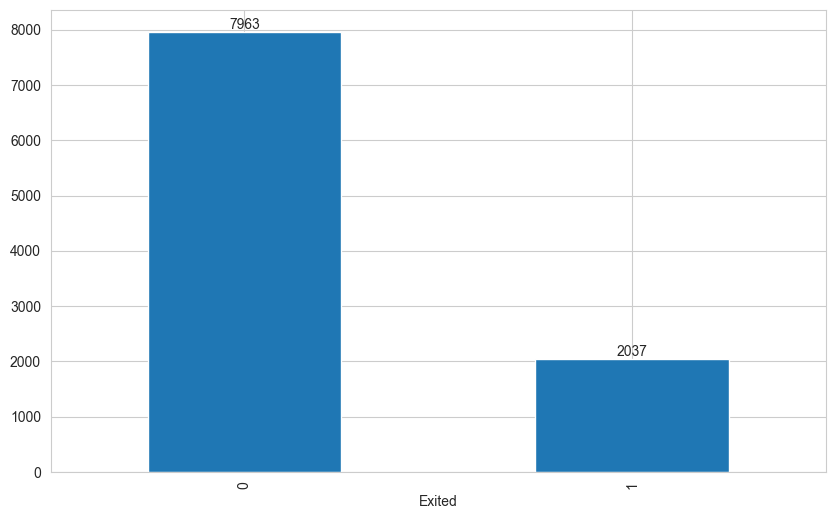

In [69]:
ax = df.Exited.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

- there is no dublicated value

In [8]:
df.duplicated().any()

False

- drop unnecessary columns

In [53]:
df.drop(columns=['Surname','CustomerId','RowNumber'],axis=1,inplace=True)

- Distribution of the numerical features

- CreditScore : has a left skew 
- Age: has a right skew
- Balance : normally distributed
- EstimatedSalary : has a uniform distribution

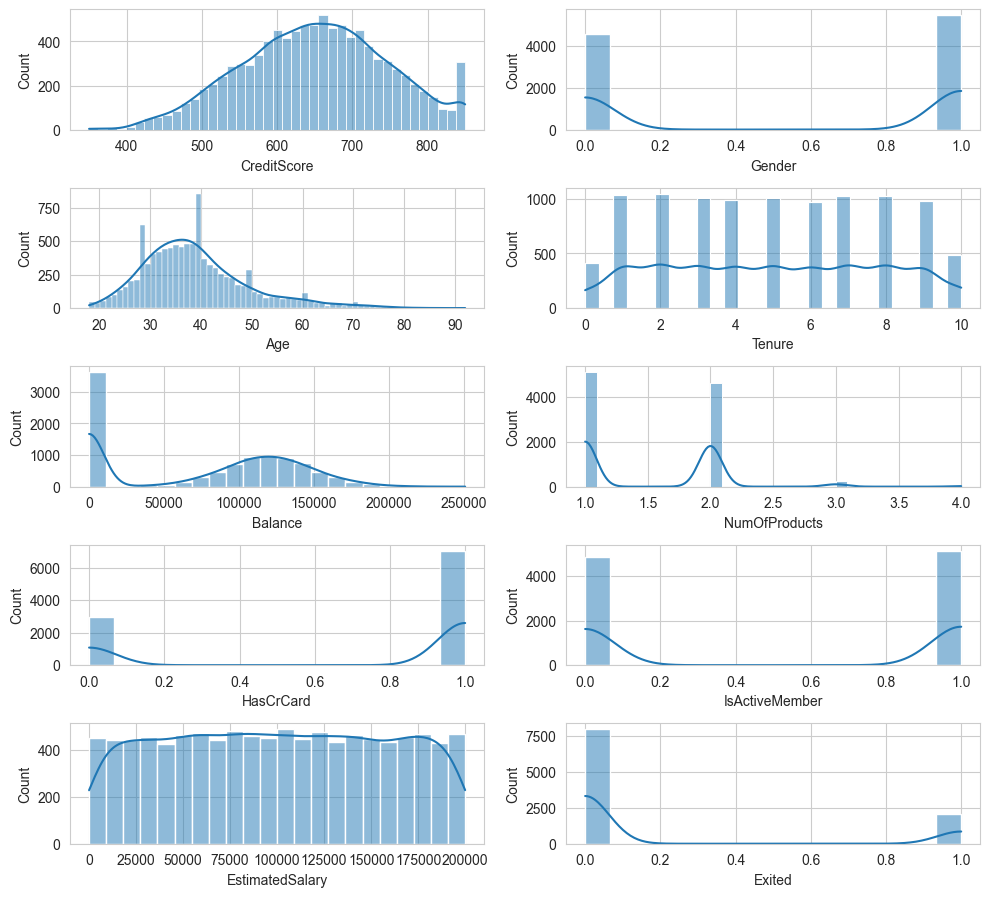

In [71]:
fig = plt.figure(figsize=(10,14))
for i, col in enumerate(df.select_dtypes('number')):
                    #n.rows,n.col,index
        plt.subplot(8,2,i+1)
        #histogram
        sns.histplot(df[col],kde=True)
plt.tight_layout();
#estimated = uniform dis.

- as we can see in the following plot that the data is overlapped 

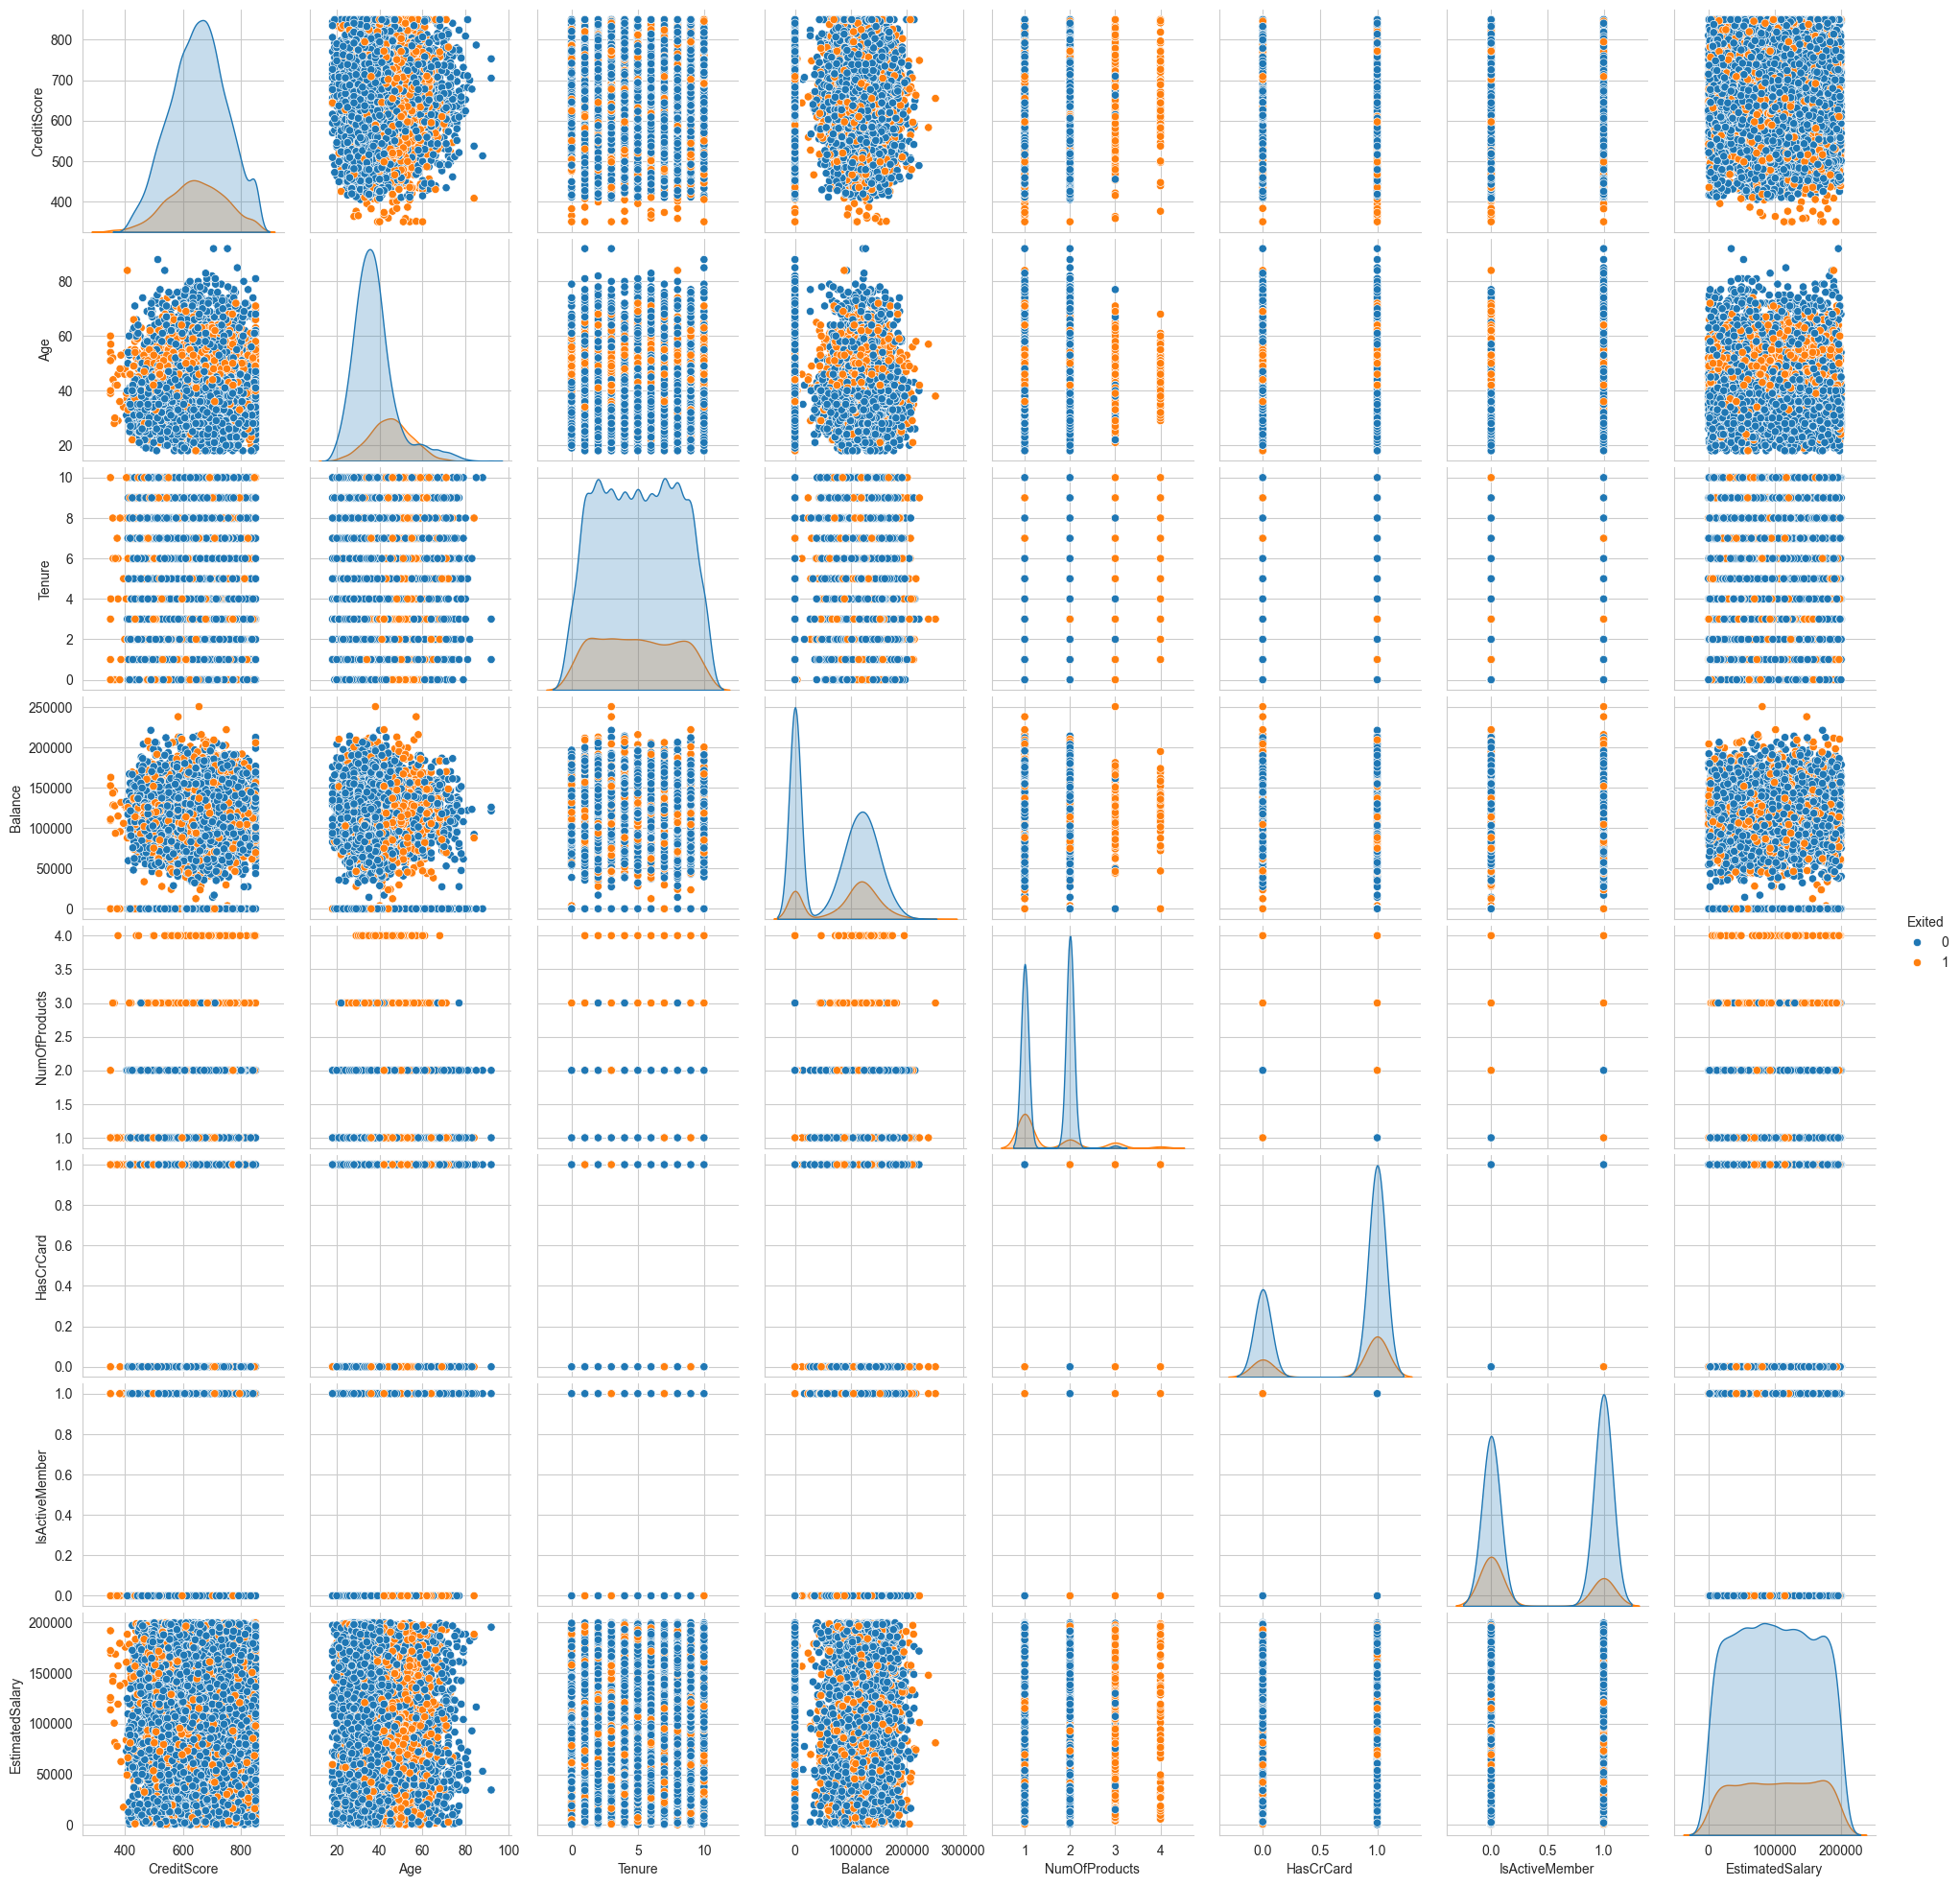

In [11]:
sns.pairplot(df, hue = 'Exited')

- we can see there is no outliers , but lets see the outliers for each class 

<Axes: >

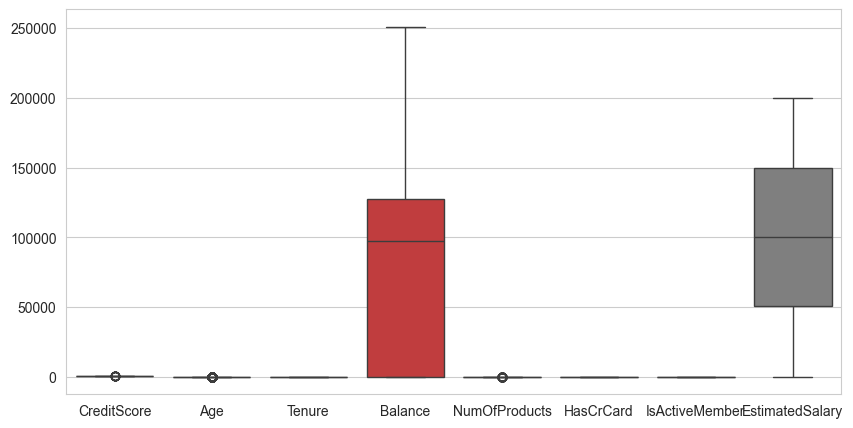

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("Exited", axis=1))

- As we can see most of the outliers is in age for class 0 

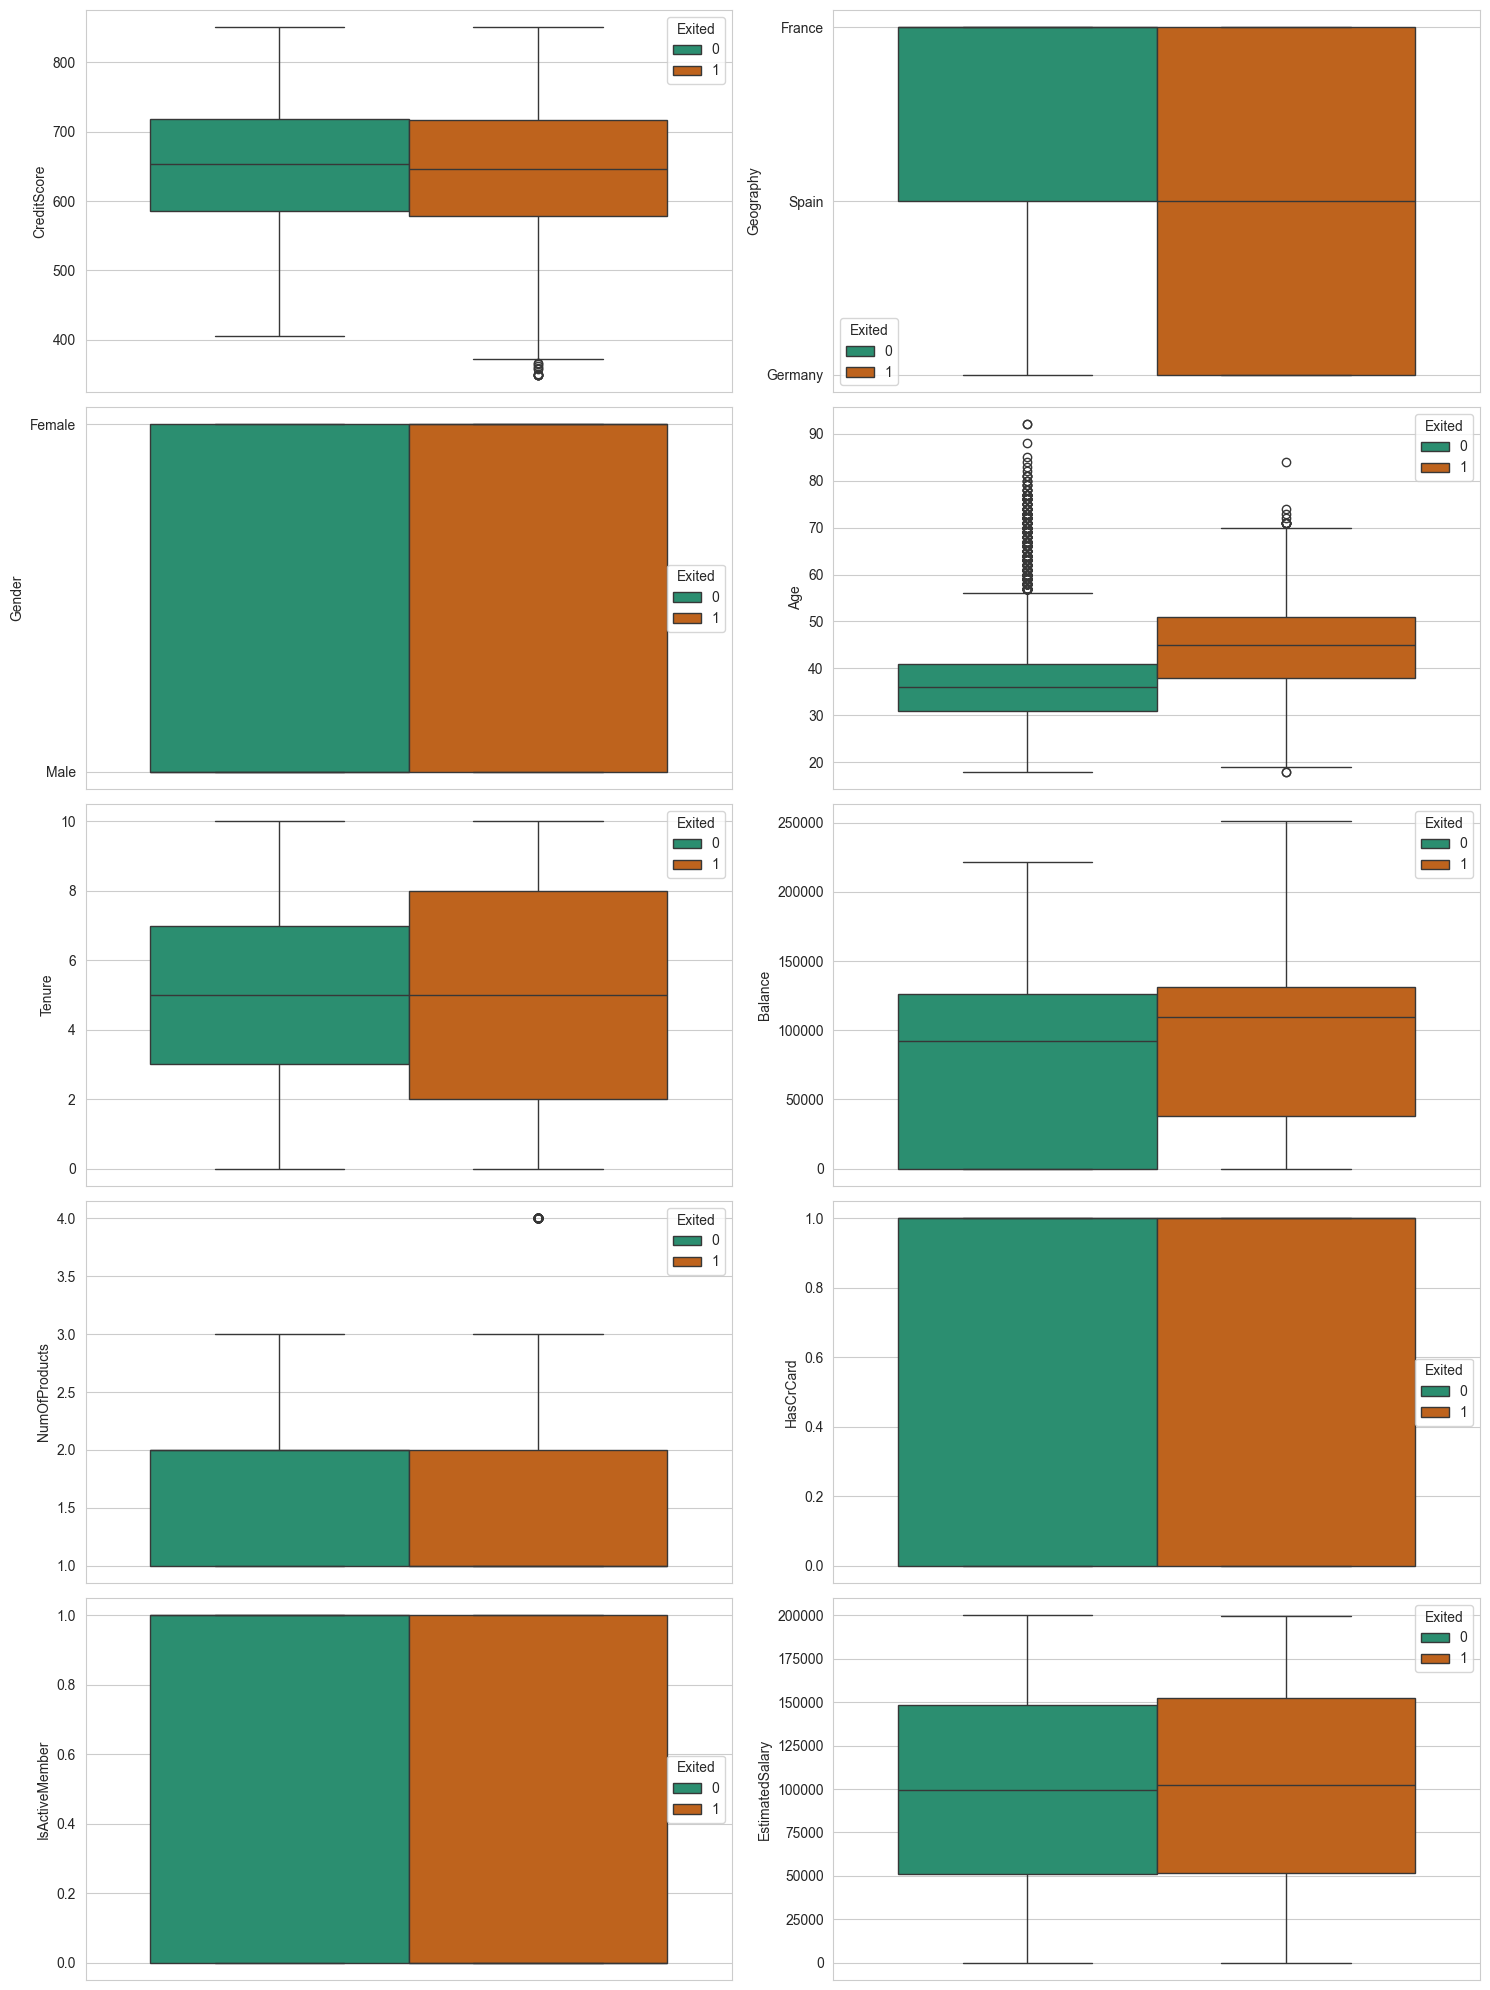

In [41]:
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(5,2,i+1)
        sns.boxplot(data = df,
                    y= df[col],
                    hue=df["Exited"],
                    palette='Dark2')
plt.tight_layout();

- counting number of outliers for each feature

In [43]:
def detect_outliers_iqr(df):
    object_col = df.select_dtypes(include=('number')).columns
    for column in object_col:
        outliers = 0
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

     
        print(f"{column:<30}:", len(df[(df[column] < lower_bound) | (df[column] > upper_bound)]))
        print()


detect_outliers_iqr(df.drop("Exited", axis=1))

CreditScore                   : 15

Age                           : 359

Tenure                        : 0

Balance                       : 0

NumOfProducts                 : 60

HasCrCard                     : 0

IsActiveMember                : 0

EstimatedSalary               : 0



- there is no multi-coliniarity

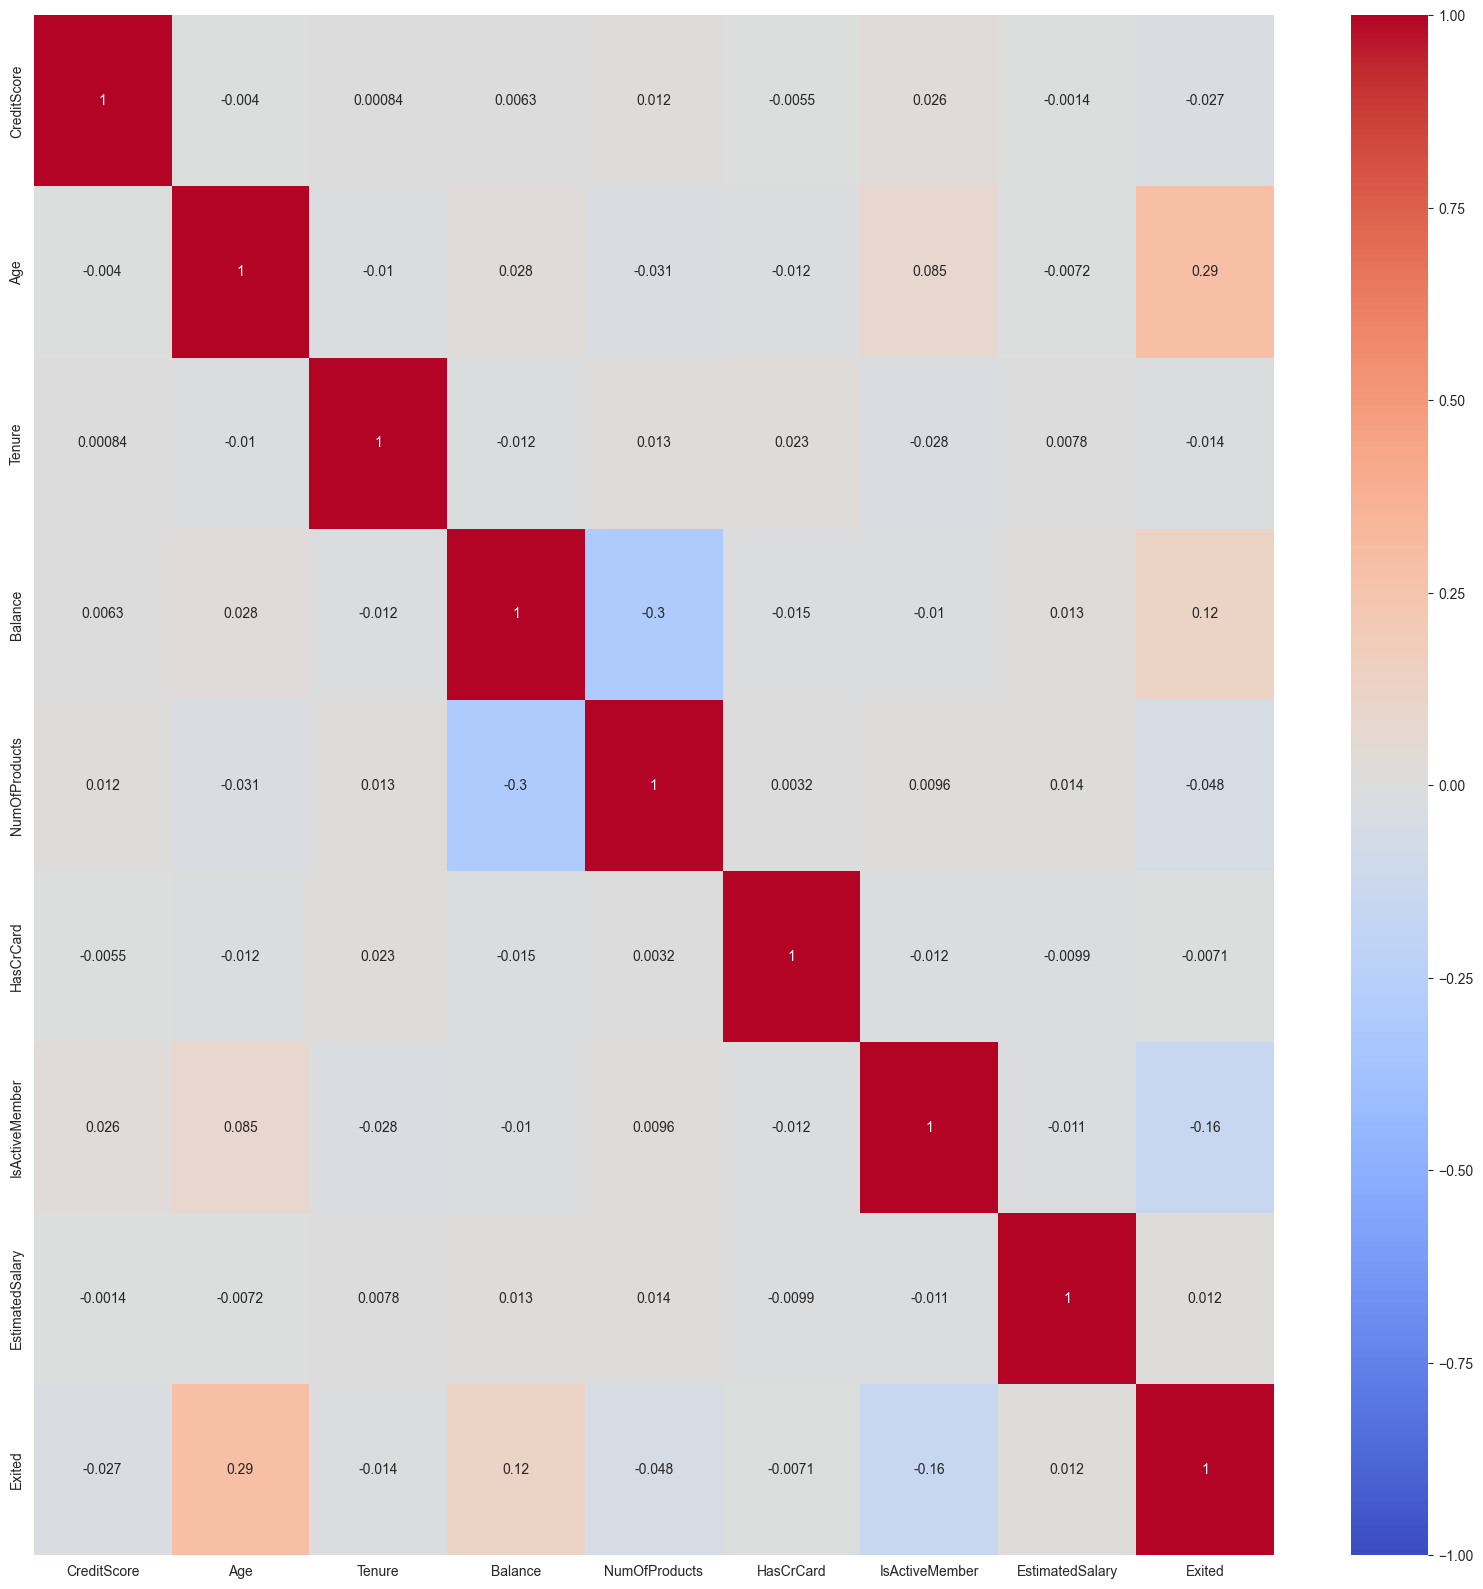

In [44]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

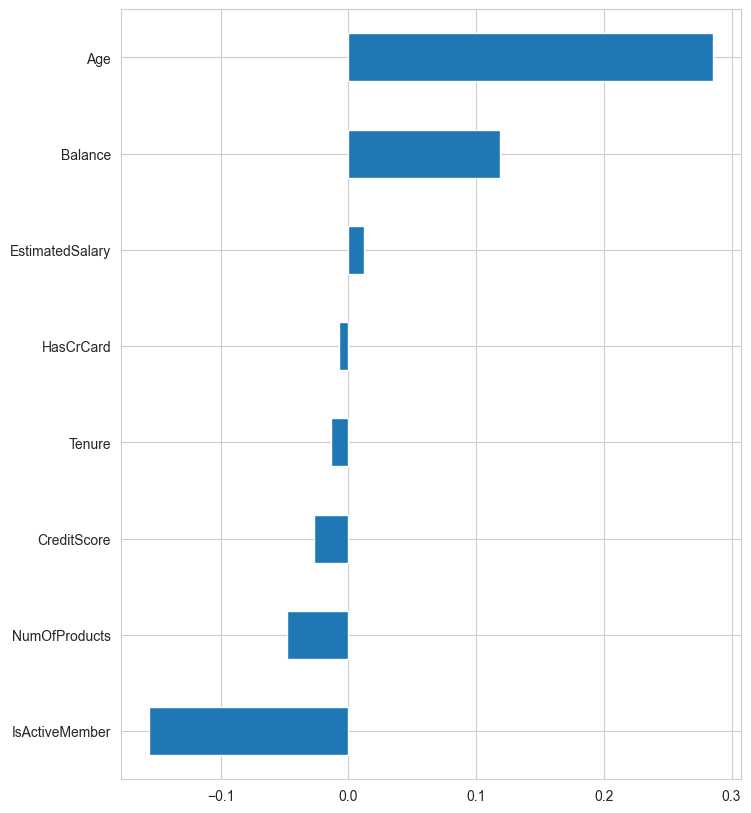

In [48]:
plt.figure(figsize=(8, 10))
df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh")
plt.show()

- we can see from the following graph that france people is the most people retain their bank account

<Axes: ylabel='Geography,Exited'>

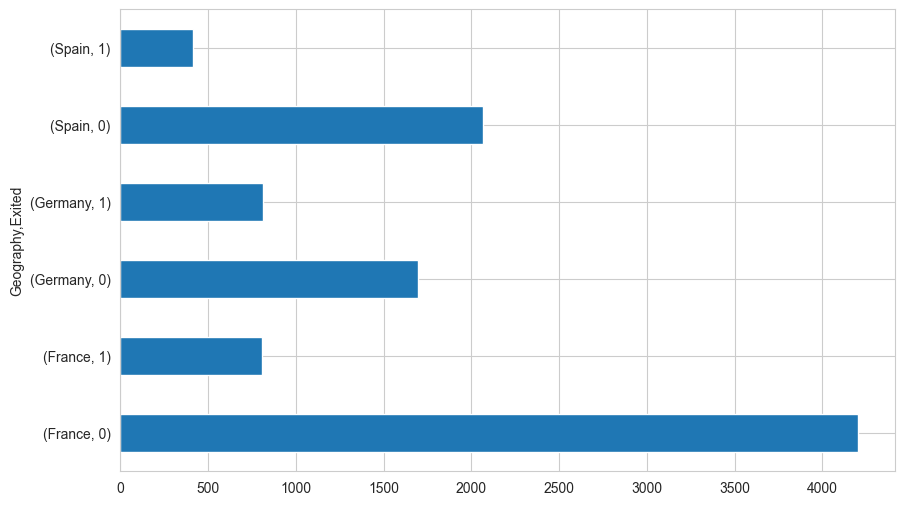

In [11]:
df.groupby(['Geography'])['Exited'].value_counts().plot(kind='barh')

- we can see from the following graph that males is the most people retain their bank account and Females is the most gender they might close their bank account

<Axes: ylabel='Gender,Exited'>

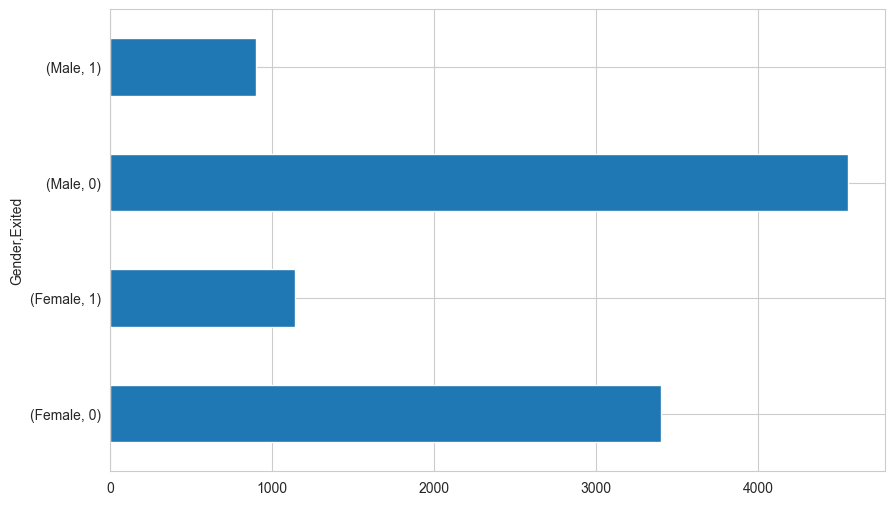

In [12]:
df.groupby(['Gender'])['Exited'].value_counts().plot(kind='barh')

- we can interpret that france male and female most likely retain their bank account 
- france female and germany female most likely close their bank account

<Axes: ylabel='Geography,Gender,Exited'>

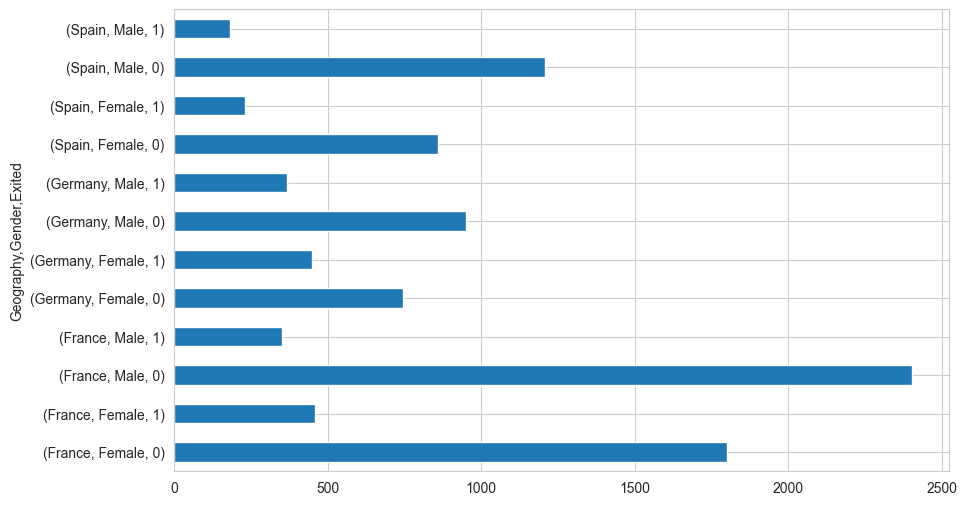

In [26]:
df.groupby(['Geography','Gender'])['Exited'].value_counts().plot(kind='barh')

- Seperate the graph for each class alone for better interpreting

<Axes: ylabel='Geography,Gender'>

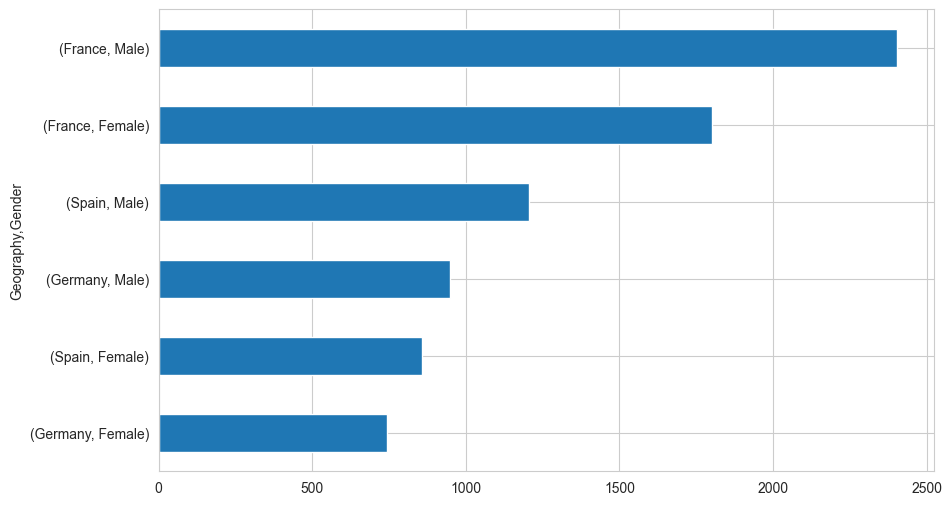

In [29]:
df[df['Exited'] == 0].groupby(['Geography','Gender']).size().sort_values().plot(kind='barh')

<Axes: ylabel='Geography,Gender'>

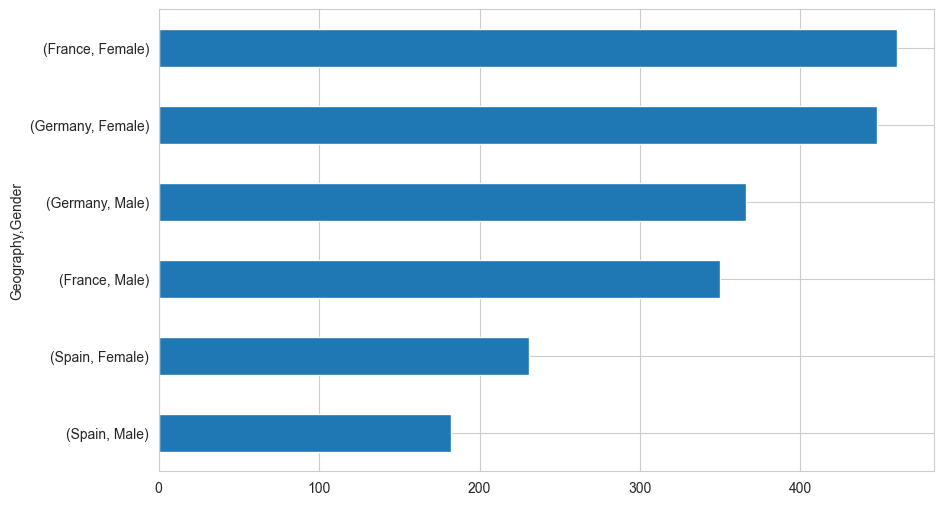

In [30]:
df[df['Exited'] == 1].groupby(['Geography','Gender']).size().sort_values().plot(kind='barh')

- we can interpret that people with account balance = 0 most likely to keep their bank account

In [46]:
df[df['Balance'] == 0]['Exited'].value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

- we have 2 object we should encode them

In [51]:
df.select_dtypes("object").nunique()

Geography    3
Gender       2
dtype: int64

In [56]:
print(df['Geography'].unique(), "\nsize is: ", df['Geography'].unique().size)

['France' 'Spain' 'Germany'] 
size is:  3


- encode the columns

In [51]:
df['Gender'] = df['Gender'].map({'Female':0, "Male":1})

- we dont need to scale IsActiveMember and HasCrCard becaue its a category just (0,1)

In [55]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [54]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [57]:
column_trans = make_column_transformer((OneHotEncoder( handle_unknown="ignore"), ['Geography']),
                                      (MinMaxScaler(),['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts',  'EstimatedSalary']),
                                      remainder='passthrough', verbose_feature_names_out=False)

# Preprocessing of Data
- Train | Test Split, Scalling

In [58]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1 , stratify=y, random_state=49)

In [60]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.1 , stratify=y_train, random_state=49)

In [61]:
x_train_trans = column_trans.fit_transform(x_train)
x_test_trans = column_trans.transform(x_test)
x_val_trans = column_trans.transform(x_val)

# Modelling & Model Performance

In [62]:
SEED = 42
import os
import random
os.environ["TF_DETERMINISTIC_OPS"] = "1"
tf.keras.utils.set_random_seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## without class_weigth

### Create The Model

In [128]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=x_train_trans.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [129]:
model.fit(x=x_train_trans,
    y=y_train,
    validation_data=(x_val_trans,y_val),
    batch_size=64,
    epochs=200,
    verbose=1,)

Epoch 1/200
127/127 [==============================] - 1s 8ms/step - loss: 0.5451 - recall: 0.0515 - val_loss: 0.4901 - val_recall: 0.0000e+00
Epoch 2/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4658 - recall: 0.0018 - val_loss: 0.4659 - val_recall: 0.0000e+00
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4510 - recall: 0.0315 - val_loss: 0.4541 - val_recall: 0.0492
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4432 - recall: 0.1018 - val_loss: 0.4467 - val_recall: 0.0710
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4368 - recall: 0.1176 - val_loss: 0.4433 - val_recall: 0.1366
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4319 - recall: 0.1636 - val_loss: 0.4395 - val_recall: 0.1093
Epoch 7/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4278 - recall: 0.1570 - val_loss: 0.4356 - val_recall: 0.1639
Epoch 8/200
127/127

127/127 [==============================] - 0s 4ms/step - loss: 0.3878 - recall: 0.3279 - val_loss: 0.4013 - val_recall: 0.2787
Epoch 60/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3877 - recall: 0.3309 - val_loss: 0.3997 - val_recall: 0.2951
Epoch 61/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3872 - recall: 0.3321 - val_loss: 0.4000 - val_recall: 0.2678
Epoch 62/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3874 - recall: 0.3376 - val_loss: 0.4003 - val_recall: 0.3115
Epoch 63/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3870 - recall: 0.3370 - val_loss: 0.4003 - val_recall: 0.2842
Epoch 64/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3871 - recall: 0.3315 - val_loss: 0.4002 - val_recall: 0.2787
Epoch 65/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3866 - recall: 0.3400 - val_loss: 0.4001 - val_recall: 0.2787
Epoch 66/200
127/127 [===========

127/127 [==============================] - 1s 4ms/step - loss: 0.3511 - recall: 0.4218 - val_loss: 0.3555 - val_recall: 0.3716
Epoch 118/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3505 - recall: 0.4236 - val_loss: 0.3545 - val_recall: 0.3825
Epoch 119/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3497 - recall: 0.4230 - val_loss: 0.3532 - val_recall: 0.3716
Epoch 120/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3485 - recall: 0.4285 - val_loss: 0.3536 - val_recall: 0.3934
Epoch 121/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3484 - recall: 0.4315 - val_loss: 0.3559 - val_recall: 0.4426
Epoch 122/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3482 - recall: 0.4394 - val_loss: 0.3500 - val_recall: 0.3880
Epoch 123/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3466 - recall: 0.4339 - val_loss: 0.3507 - val_recall: 0.4208
Epoch 124/200
127/127 [====

127/127 [==============================] - 1s 4ms/step - loss: 0.3343 - recall: 0.4867 - val_loss: 0.3427 - val_recall: 0.4809
Epoch 176/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3344 - recall: 0.4867 - val_loss: 0.3377 - val_recall: 0.4645
Epoch 177/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3343 - recall: 0.4848 - val_loss: 0.3388 - val_recall: 0.4536
Epoch 178/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3335 - recall: 0.4733 - val_loss: 0.3380 - val_recall: 0.4590
Epoch 179/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3347 - recall: 0.4745 - val_loss: 0.3375 - val_recall: 0.4372
Epoch 180/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3338 - recall: 0.4824 - val_loss: 0.3377 - val_recall: 0.4754
Epoch 181/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3332 - recall: 0.4788 - val_loss: 0.3359 - val_recall: 0.4481
Epoch 182/200
127/127 [====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

#### we can see that the losses is between 0.3 - 0.4 and the recalls between 0.4 - 0.5 . lets try to get better result

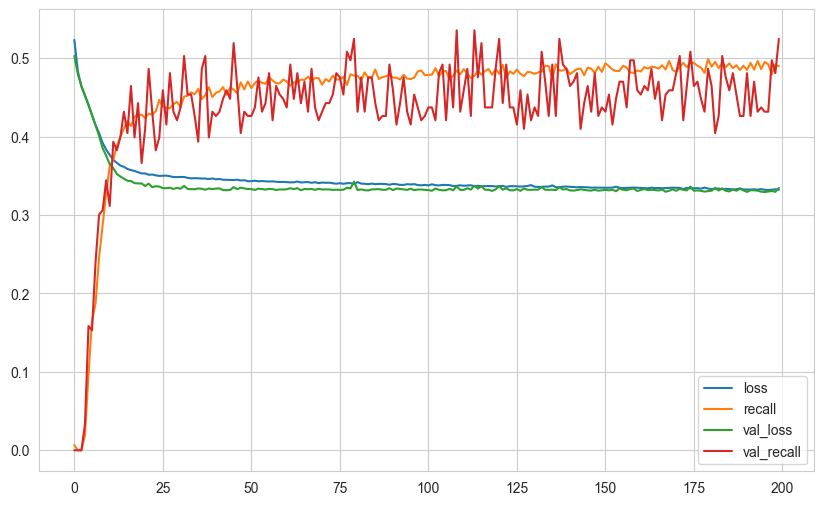

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

- the recall for class 1 is low and not acceptable

In [66]:
vanilla_loss, vanilla_recall = model.evaluate(x_test_trans, y_test, verbose=0)
print("loss: ", vanilla_loss)
print("recall: ", vanilla_recall)

loss:  0.33655428886413574
recall:  0.5490196347236633


In [87]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 3ms/step
[[753  43]
 [ 92 112]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       796
           1       0.72      0.55      0.62       204

    accuracy                           0.86      1000
   macro avg       0.81      0.75      0.77      1000
weighted avg       0.86      0.86      0.86      1000

Train Set
254/254 [==============================] - 0s 2ms/step
[[6096  354]
 [ 746  904]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6450
           1       0.72      0.55      0.62      1650

    accuracy                           0.86      8100
   macro avg       0.80      0.75      0.77      8100
weighted avg       0.86      0.86      0.86      8100



#### from the roc curve we can see that we could get a better result by different threshold 

32/32 [==============================] - 0s 992us/step


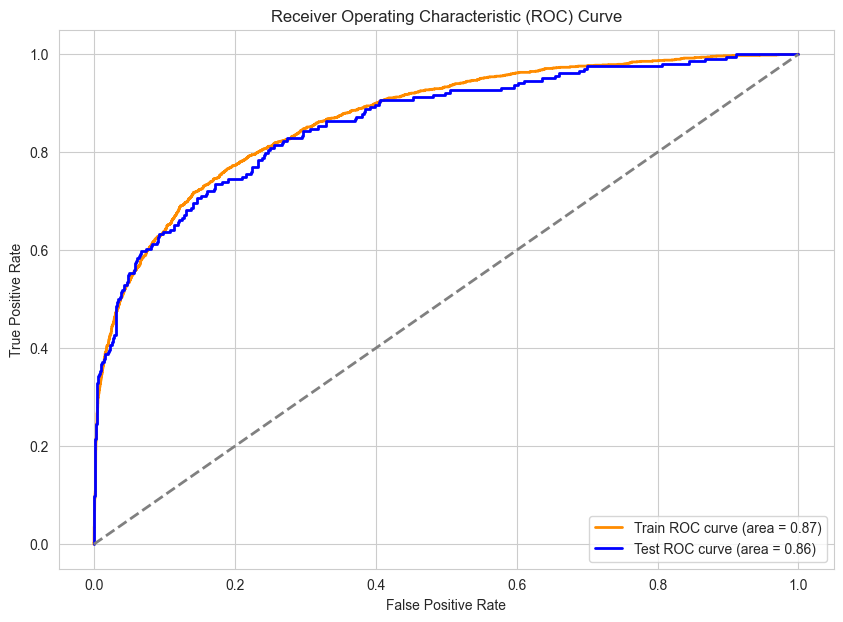

In [130]:
train_probs = model.predict(x_train_trans)
test_probs = model.predict(x_test_trans)

# Compute ROC curve and ROC area for both training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
vanilla_roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
vanilla_roc_auc_test = auc(fpr_test, tpr_test)

# Plotting
plt.figure(figsize=(10,7))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {vanilla_roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC curve (area = {vanilla_roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Finding Best Thresholds

In [93]:
y_prob = model.predict(x_val_trans)
#fpr, tpr, thresholds_roc = roc_curve(y_val, y_prob)
#dict = {"precisions":fpr, "recalls":tpr, "threshold":thresholds_roc}
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_prob)
dict = {"precisions":precision[:-1], "recalls":recall[:-1], "threshold":thresholds_pr}
df_metric = pd.DataFrame(dict).sort_values(by = ["recalls", "precisions"], ascending=False)
df_metric

precisions  recalls  threshold
129       0.237    1.000      0.030
128       0.237    1.000      0.030
127       0.237    1.000      0.030
126       0.236    1.000      0.030
125       0.236    1.000      0.030
124       0.236    1.000      0.029
123       0.236    1.000      0.029
122       0.235    1.000      0.029
121       0.235    1.000      0.029
120       0.235    1.000      0.029
119       0.234    1.000      0.029
118       0.234    1.000      0.028
117       0.234    1.000      0.028
116       0.233    1.000      0.028
115       0.233    1.000      0.028
114       0.233    1.000      0.028
113       0.233    1.000      0.028
112       0.232    1.000      0.027
111       0.232    1.000      0.027
110       0.232    1.000      0.027
109       0.231    1.000      0.027
108       0.231    1.000      0.027
107       0.231    1.000      0.026
106       0.230    1.000      0.026
105       0.230    1.000      0.026
104       0.230    1.000      0.025
103       0.230    1.000      0.025
102       0.229    1.000      0.025
101       0.229    1.000      0.025
100       0.229    1.000      0.024
99        0.228    1.000      0.024
98        0.228    1.000      0.024
97        0.228    1.000      0.024
96        0.228    1.000      0.024
95        0.227    1.000      0.023
94        0.227    1.000      0.023
93        0.227    1.000      0.023
92        0.226    1.000      0.022
91        0.226    1.000      0.022
90        0.226    1.000      0.022
89        0.226    1.000      0.022
88        0.225    1.000      0.022
87        0.225    1.000      0.022
86        0.225    1.000      0.021
85        0.225    1.000      0.021
84        0.224    1.000      0.021
83        0.224    1.000      0.020
82        0.224    1.000      0.020
81        0.223    1.000      0.020
80        0.223    1.000      0.020
79        0.223    1.000      0.019
78        0.223    1.000      0.019
77        0.222    1.000      0.019
76        0.222    1.000      0.019
75        0.222    1.000      0.019
74        0.222    1.000      0.019
73        0.221    1.000      0.019
72        0.221    1.000      0.019
71        0.221    1.000      0.019
70        0.220    1.000      0.019
69        0.220    1.000      0.018
68        0.220    1.000      0.018
67        0.220    1.000      0.018
66        0.219    1.000      0.018
65        0.219    1.000      0.018
64        0.219    1.000      0.018
63        0.219    1.000      0.018
62        0.218    1.000      0.018
61        0.218    1.000      0.018
60        0.218    1.000      0.018
59        0.218    1.000      0.018
58        0.217    1.000      0.018
57        0.217    1.000      0.017
56        0.217    1.000      0.017
55        0.217    1.000      0.017
54        0.216    1.000      0.017
53        0.216    1.000      0.016
52        0.216    1.000      0.016
51        0.216    1.000      0.016
50        0.215    1.000      0.016
49        0.215    1.000      0.015
48        0.215    1.000      0.015
47        0.215    1.000      0.015
46        0.214    1.000      0.014
45        0.214    1.000      0.014
44        0.214    1.000      0.014
43        0.214    1.000      0.014
42        0.213    1.000      0.014
41        0.213    1.000      0.013
40        0.213    1.000      0.013
39        0.213    1.000      0.013
38        0.212    1.000      0.013
37        0.212    1.000      0.012
36        0.212    1.000      0.012
35        0.212    1.000      0.012
34        0.211    1.000      0.012
33        0.211    1.000      0.011
32        0.211    1.000      0.011
31        0.211    1.000      0.011
30        0.210    1.000      0.010
29        0.210    1.000      0.010
28        0.210    1.000      0.010
27        0.210    1.000      0.009
26        0.209    1.000      0.009
25        0.209    1.000      0.009
24        0.209    1.000      0.009
23        0.209    1.000      0.009
22        0.208    1.000      0.008
21        0.208    1.000      0.008
20        0.208    1.000      0.008
19       

#### After we finding the best thresholds we getting better result as we can see from the following table 

In [92]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.172
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.172
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 3ms/step
[[565 231]
 [ 34 170]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       796
           1       0.42      0.83      0.56       204

    accuracy                           0.73      1000
   macro avg       0.68      0.77      0.69      1000
weighted avg       0.84      0.73      0.76      1000

Train Set
254/254 [==============================] - 0s 2ms/step
[[4424 2026]
 [ 247 1403]]
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      6450
           1       0.41      0.85      0.55      1650

    accuracy                           0.72      8100
   macro avg       0.68      0.77      0.67      8100
weighted avg       0.84      0.72      0.75      8100



In [94]:
vanilla_recall_thre = 0.83

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [102]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=x_train_trans.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [103]:
class_weights = compute_class_weight('balanced', classes = np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [104]:
model.fit(x=x_train_trans,
    y=y_train,
    validation_data=(x_val_trans,y_val),
    batch_size=64,
    epochs=200,
    verbose=1,
    class_weight = class_weights)

Epoch 1/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6986 - recall: 0.0333 - val_loss: 0.6353 - val_recall: 0.1366
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.6750 - recall: 0.3170 - val_loss: 0.6156 - val_recall: 0.4426
Epoch 3/200
127/127 [==============================] - 1s 5ms/step - loss: 0.6603 - recall: 0.5103 - val_loss: 0.6181 - val_recall: 0.5847
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.6454 - recall: 0.6164 - val_loss: 0.6121 - val_recall: 0.6120
Epoch 5/200
127/127 [==============================] - 1s 4ms/step - loss: 0.6295 - recall: 0.6418 - val_loss: 0.6247 - val_recall: 0.6667
Epoch 6/200
127/127 [==============================] - 1s 4ms/step - loss: 0.6168 - recall: 0.6679 - val_loss: 0.6366 - val_recall: 0.6995
Epoch 7/200
127/127 [==============================] - 1s 4ms/step - loss: 0.6041 - recall: 0.6752 - val_loss: 0.6214 - val_recall: 0.6995
Epoch 8/200
127/127 [======

127/127 [==============================] - 1s 4ms/step - loss: 0.4790 - recall: 0.7661 - val_loss: 0.4861 - val_recall: 0.8251
Epoch 60/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4778 - recall: 0.7679 - val_loss: 0.4701 - val_recall: 0.8087
Epoch 61/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4776 - recall: 0.7727 - val_loss: 0.4528 - val_recall: 0.7869
Epoch 62/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4773 - recall: 0.7697 - val_loss: 0.4844 - val_recall: 0.8087
Epoch 63/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4777 - recall: 0.7794 - val_loss: 0.4664 - val_recall: 0.7978
Epoch 64/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4783 - recall: 0.7600 - val_loss: 0.4859 - val_recall: 0.8142
Epoch 65/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4776 - recall: 0.7727 - val_loss: 0.4566 - val_recall: 0.7923
Epoch 66/200
127/127 [===========

127/127 [==============================] - 1s 4ms/step - loss: 0.4671 - recall: 0.7770 - val_loss: 0.4402 - val_recall: 0.8033
Epoch 118/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4666 - recall: 0.7727 - val_loss: 0.4681 - val_recall: 0.8142
Epoch 119/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4661 - recall: 0.7709 - val_loss: 0.4476 - val_recall: 0.7978
Epoch 120/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4657 - recall: 0.7703 - val_loss: 0.4828 - val_recall: 0.8361
Epoch 121/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4657 - recall: 0.7770 - val_loss: 0.4989 - val_recall: 0.8470
Epoch 122/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4659 - recall: 0.7727 - val_loss: 0.4451 - val_recall: 0.7869
Epoch 123/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4659 - recall: 0.7752 - val_loss: 0.4798 - val_recall: 0.8087
Epoch 124/200
127/127 [====

127/127 [==============================] - 1s 4ms/step - loss: 0.4586 - recall: 0.7812 - val_loss: 0.4914 - val_recall: 0.8525
Epoch 176/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4579 - recall: 0.7818 - val_loss: 0.4445 - val_recall: 0.8087
Epoch 177/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4583 - recall: 0.7818 - val_loss: 0.4782 - val_recall: 0.8361
Epoch 178/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4580 - recall: 0.7818 - val_loss: 0.4578 - val_recall: 0.8197
Epoch 179/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4590 - recall: 0.7770 - val_loss: 0.4193 - val_recall: 0.7814
Epoch 180/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4577 - recall: 0.7788 - val_loss: 0.4553 - val_recall: 0.8142
Epoch 181/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4569 - recall: 0.7812 - val_loss: 0.4563 - val_recall: 0.8197
Epoch 182/200
127/127 [====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

#### we are getting better result than the vanilla model but not good as the tuned vanilla model, so lets try to tuning the thresholds

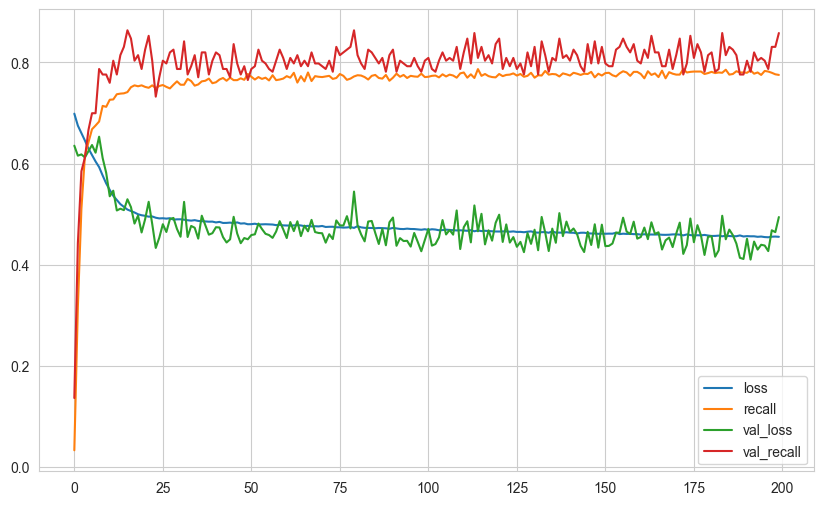

In [105]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [106]:
weighted_loss, weighted_recall = model.evaluate(x_test_trans, y_test, verbose=0)
print("loss: ", weighted_loss)
print("recall: ", weighted_recall)

loss:  0.4847896695137024
recall:  0.813725471496582


In [107]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 2ms/step
[[589 207]
 [ 38 166]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       796
           1       0.45      0.81      0.58       204

    accuracy                           0.76      1000
   macro avg       0.69      0.78      0.70      1000
weighted avg       0.84      0.76      0.78      1000

Train Set
254/254 [==============================] - 0s 1ms/step
[[4647 1803]
 [ 282 1368]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      6450
           1       0.43      0.83      0.57      1650

    accuracy                           0.74      8100
   macro avg       0.69      0.77      0.69      8100
weighted avg       0.84      0.74      0.77      8100



32/32 [==============================] - 0s 1ms/step


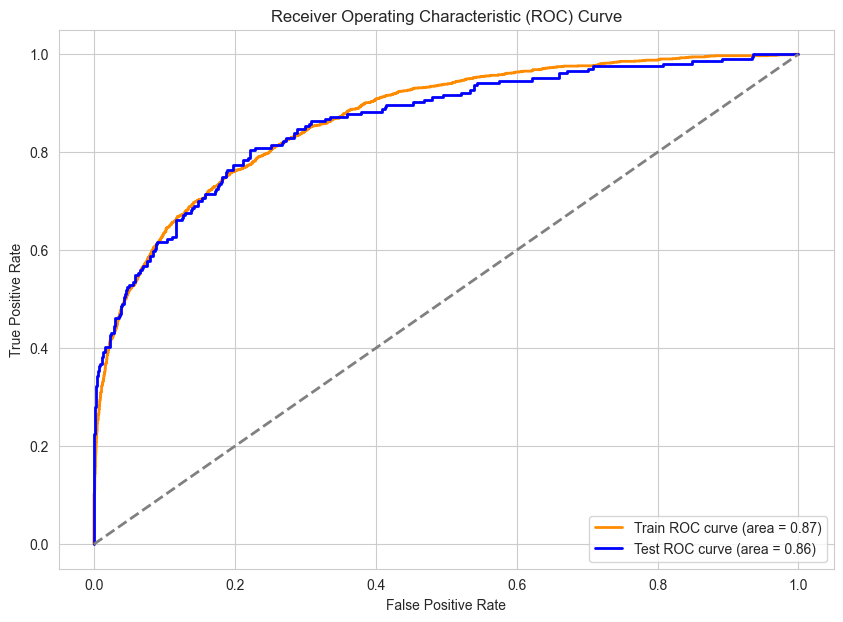

In [108]:
train_probs = model.predict(x_train_trans)
test_probs = model.predict(x_test_trans)

# Compute ROC curve and ROC area for both training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
weighted_roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
weighted_roc_auc_test = auc(fpr_test, tpr_test)

# Plotting
plt.figure(figsize=(10,7))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {weighted_roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC curve (area = {weighted_roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Finding Best Thresholds

## Im getting very nice result after tuning the thresholds

In [109]:
y_prob = model.predict(x_val_trans)
#fpr, tpr, thresholds_roc = roc_curve(y_val, y_prob)
#dict = {"precisions":fpr, "recalls":tpr, "threshold":thresholds_roc}
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_prob)
dict = {"precisions":precision[:-1], "recalls":recall[:-1], "threshold":thresholds_pr}
df_metric = pd.DataFrame(dict).sort_values(by = ["recalls", "precisions"], ascending=False)
df_metric

29/29 [==============================] - 0s 3ms/step


precisions  recalls  threshold
175       0.252    1.000      0.123
174       0.252    1.000      0.123
173       0.252    1.000      0.122
172       0.251    1.000      0.122
171       0.251    1.000      0.119
170       0.251    1.000      0.118
169       0.250    1.000      0.118
168       0.250    1.000      0.118
167       0.250    1.000      0.116
166       0.249    1.000      0.116
165       0.249    1.000      0.115
164       0.249    1.000      0.115
163       0.248    1.000      0.115
162       0.248    1.000      0.115
161       0.248    1.000      0.115
160       0.247    1.000      0.114
159       0.247    1.000      0.113
158       0.247    1.000      0.111
157       0.246    1.000      0.110
156       0.246    1.000      0.110
155       0.246    1.000      0.109
154       0.245    1.000      0.108
153       0.245    1.000      0.108
152       0.245    1.000      0.107
151       0.244    1.000      0.106
150       0.244    1.000      0.106
149       0.244    1.000      0.106
148       0.243    1.000      0.105
147       0.243    1.000      0.104
146       0.243    1.000      0.103
145       0.242    1.000      0.101
144       0.242    1.000      0.101
143       0.242    1.000      0.100
142       0.241    1.000      0.100
141       0.241    1.000      0.098
140       0.241    1.000      0.097
139       0.240    1.000      0.097
138       0.240    1.000      0.097
137       0.240    1.000      0.097
136       0.240    1.000      0.097
135       0.239    1.000      0.096
134       0.239    1.000      0.096
133       0.239    1.000      0.095
132       0.238    1.000      0.094
131       0.238    1.000      0.094
130       0.238    1.000      0.093
129       0.237    1.000      0.093
128       0.237    1.000      0.092
127       0.237    1.000      0.090
126       0.236    1.000      0.089
125       0.236    1.000      0.089
124       0.236    1.000      0.088
123       0.236    1.000      0.088
122       0.235    1.000      0.087
121       0.235    1.000      0.087
120       0.235    1.000      0.086
119       0.234    1.000      0.084
118       0.234    1.000      0.084
117       0.234    1.000      0.084
116       0.233    1.000      0.084
115       0.233    1.000      0.084
114       0.233    1.000      0.084
113       0.233    1.000      0.083
112       0.232    1.000      0.082
111       0.232    1.000      0.082
110       0.232    1.000      0.081
109       0.231    1.000      0.080
108       0.231    1.000      0.080
107       0.231    1.000      0.079
106       0.230    1.000      0.077
105       0.230    1.000      0.077
104       0.230    1.000      0.076
103       0.230    1.000      0.076
102       0.229    1.000      0.076
101       0.229    1.000      0.075
100       0.229    1.000      0.075
99        0.228    1.000      0.074
98        0.228    1.000      0.072
97        0.228    1.000      0.072
96        0.228    1.000      0.072
95        0.227    1.000      0.072
94        0.227    1.000      0.071
93        0.227    1.000      0.071
92        0.226    1.000      0.071
91        0.226    1.000      0.071
90        0.226    1.000      0.070
89        0.226    1.000      0.070
88        0.225    1.000      0.069
87        0.225    1.000      0.067
86        0.225    1.000      0.067
85        0.225    1.000      0.067
84        0.224    1.000      0.066
83        0.224    1.000      0.066
82        0.224    1.000      0.066
81        0.223    1.000      0.065
80        0.223    1.000      0.065
79        0.223    1.000      0.065
78        0.223    1.000      0.065
77        0.222    1.000      0.064
76        0.222    1.000      0.064
75        0.222    1.000      0.064
74        0.222    1.000      0.063
73        0.221    1.000      0.063
72        0.221    1.000      0.063
71        0.221    1.000      0.062
70        0.220    1.000      0.062
69        0.220    1.000      0.062
68        0.220    1.000      0.061
67        0.220    1.000      0.061
66        0.219    1.000      0.060
65       

In [120]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.40
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.40
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 2ms/step
[[514 282]
 [ 26 178]]
              precision    recall  f1-score   support

           0       0.95      0.65      0.77       796
           1       0.39      0.87      0.54       204

    accuracy                           0.69      1000
   macro avg       0.67      0.76      0.65      1000
weighted avg       0.84      0.69      0.72      1000

Train Set
254/254 [==============================] - 0s 1ms/step
[[4064 2386]
 [ 185 1465]]
              precision    recall  f1-score   support

           0       0.96      0.63      0.76      6450
           1       0.38      0.89      0.53      1650

    accuracy                           0.68      8100
   macro avg       0.67      0.76      0.65      8100
weighted avg       0.84      0.68      0.71      8100



In [123]:
y_probs = model.predict(x_test_trans)
y_pred = (y_probs >= 0.40).astype(int)
weighted_recall_thre = recall_score(y_test, y_pred)
weighted_recall_thre

32/32 [==============================] - 0s 3ms/step


0.8725490196078431

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [131]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=x_train_trans.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.09)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [132]:
model.fit(x=x_train_trans,
    y=y_train,
    validation_data=(x_val_trans,y_val),
    batch_size=64,
    epochs=200,
    verbose=1)#0.001

Epoch 1/200
127/127 [==============================] - 1s 7ms/step - loss: 0.4778 - recall: 0.0097 - val_loss: 0.4404 - val_recall: 0.0000e+00
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4424 - recall: 0.0030 - val_loss: 0.4545 - val_recall: 0.0000e+00
Epoch 3/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4353 - recall: 0.1709 - val_loss: 0.4233 - val_recall: 0.2787
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4269 - recall: 0.2430 - val_loss: 0.4079 - val_recall: 0.2131
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4215 - recall: 0.2739 - val_loss: 0.4052 - val_recall: 0.2404
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4164 - recall: 0.2824 - val_loss: 0.4376 - val_recall: 0.2732
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4195 - recall: 0.2830 - val_loss: 0.4015 - val_recall: 0.2623
Epoch 8/200
127/127

127/127 [==============================] - 1s 4ms/step - loss: 0.4030 - recall: 0.3630 - val_loss: 0.4047 - val_recall: 0.2623
Epoch 60/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3983 - recall: 0.3582 - val_loss: 0.3980 - val_recall: 0.2568
Epoch 61/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4015 - recall: 0.3661 - val_loss: 0.4085 - val_recall: 0.3115
Epoch 62/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4011 - recall: 0.3673 - val_loss: 0.3918 - val_recall: 0.3060
Epoch 63/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4017 - recall: 0.3636 - val_loss: 0.4010 - val_recall: 0.3825
Epoch 64/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3973 - recall: 0.3630 - val_loss: 0.3946 - val_recall: 0.3224
Epoch 65/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4096 - recall: 0.3570 - val_loss: 0.4104 - val_recall: 0.2459
Epoch 66/200
127/127 [===========

127/127 [==============================] - 0s 4ms/step - loss: 0.4017 - recall: 0.3758 - val_loss: 0.4430 - val_recall: 0.2404
Epoch 118/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3962 - recall: 0.3745 - val_loss: 0.3913 - val_recall: 0.3497
Epoch 119/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4023 - recall: 0.3782 - val_loss: 0.3915 - val_recall: 0.3607
Epoch 120/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3970 - recall: 0.3721 - val_loss: 0.4519 - val_recall: 0.5301
Epoch 121/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4050 - recall: 0.3721 - val_loss: 0.4142 - val_recall: 0.4809
Epoch 122/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4087 - recall: 0.3873 - val_loss: 0.3984 - val_recall: 0.3880
Epoch 123/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3971 - recall: 0.3727 - val_loss: 0.3968 - val_recall: 0.3443
Epoch 124/200
127/127 [====

127/127 [==============================] - 1s 4ms/step - loss: 0.3972 - recall: 0.3903 - val_loss: 0.3949 - val_recall: 0.2951
Epoch 176/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3978 - recall: 0.3824 - val_loss: 0.3902 - val_recall: 0.3607
Epoch 177/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4015 - recall: 0.3697 - val_loss: 0.4047 - val_recall: 0.3552
Epoch 178/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3984 - recall: 0.3685 - val_loss: 0.4135 - val_recall: 0.4426
Epoch 179/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4002 - recall: 0.3933 - val_loss: 0.4019 - val_recall: 0.3279
Epoch 180/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4011 - recall: 0.3921 - val_loss: 0.3917 - val_recall: 0.3880
Epoch 181/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3918 - recall: 0.3830 - val_loss: 0.4006 - val_recall: 0.3224
Epoch 182/200
127/127 [====

## after increasing the learning rate we get worse results than before even if i try to tune the threshold i dont belive that i can get better result because the roc curve below shows over fitting if i change the threshold

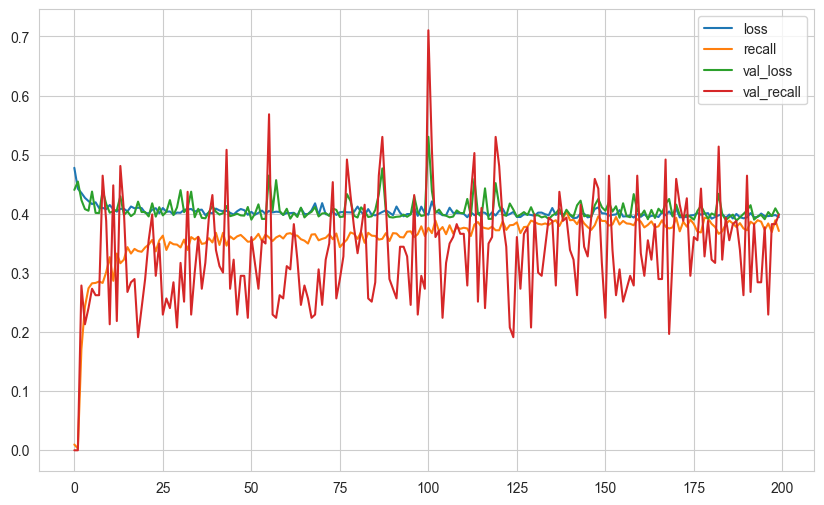

In [133]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [134]:
learning_loss, learning_recall = model.evaluate(x_test_trans, y_test, verbose=0)
print("loss: ", learning_loss)
print("recall: ", learning_recall)

loss:  0.41319867968559265
recall:  0.4313725531101227


In [135]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 3ms/step
[[745  51]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       796
           1       0.63      0.43      0.51       204

    accuracy                           0.83      1000
   macro avg       0.75      0.68      0.71      1000
weighted avg       0.82      0.83      0.82      1000

Train Set
254/254 [==============================] - 0s 2ms/step
[[6044  406]
 [ 895  755]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6450
           1       0.65      0.46      0.54      1650

    accuracy                           0.84      8100
   macro avg       0.76      0.70      0.72      8100
weighted avg       0.83      0.84      0.83      8100



32/32 [==============================] - 0s 2ms/step


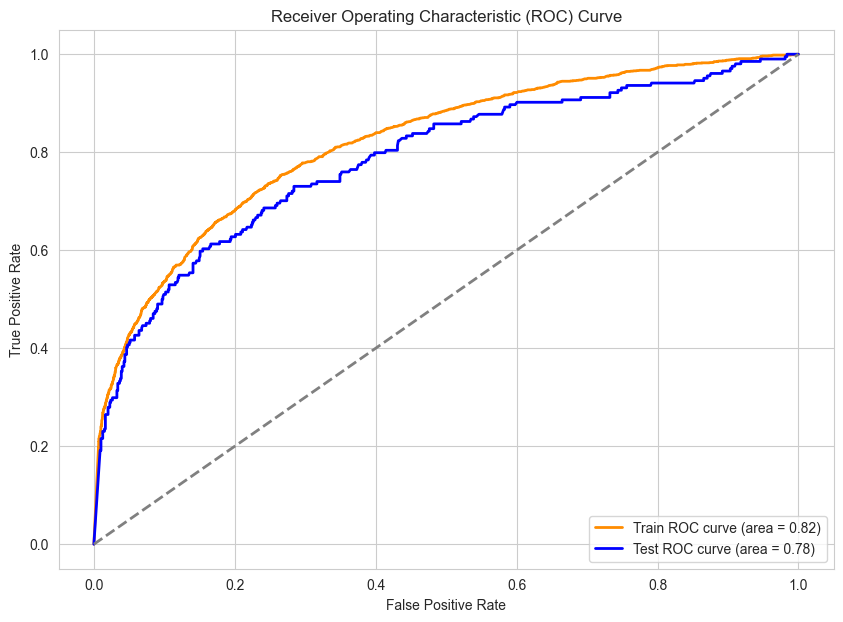

In [136]:
train_probs = model.predict(x_train_trans)
test_probs = model.predict(x_test_trans)

# Compute ROC curve and ROC area for both training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
learning_roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
learning_roc_auc_test = auc(fpr_test, tpr_test)

# Plotting
plt.figure(figsize=(10,7))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {learning_roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC curve (area = {learning_roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Add Dropout Layer

In [137]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=x_train_trans.shape[1]))
model.add(Dropout(0.1))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [138]:
model.fit(x=x_train_trans,
    y=y_train,
    validation_data=(x_val_trans,y_val),
    batch_size=64,
    epochs=200,
    verbose=1)

Epoch 1/200
127/127 [==============================] - 1s 8ms/step - loss: 0.4831 - recall: 0.0139 - val_loss: 0.4563 - val_recall: 0.0000e+00
Epoch 2/200
127/127 [==============================] - 1s 7ms/step - loss: 0.4422 - recall: 0.1133 - val_loss: 0.4157 - val_recall: 0.2568
Epoch 3/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4054 - recall: 0.2909 - val_loss: 0.3772 - val_recall: 0.3716
Epoch 4/200
127/127 [==============================] - 0s 4ms/step - loss: 0.3854 - recall: 0.3442 - val_loss: 0.3484 - val_recall: 0.4645
Epoch 5/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3817 - recall: 0.3782 - val_loss: 0.3744 - val_recall: 0.4372
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3821 - recall: 0.3661 - val_loss: 0.3485 - val_recall: 0.3825
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3720 - recall: 0.3794 - val_loss: 0.3517 - val_recall: 0.3552
Epoch 8/200
127/127 [==

127/127 [==============================] - 1s 5ms/step - loss: 0.3455 - recall: 0.4327 - val_loss: 0.3314 - val_recall: 0.4208
Epoch 60/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3432 - recall: 0.4406 - val_loss: 0.3343 - val_recall: 0.3934
Epoch 61/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3454 - recall: 0.4188 - val_loss: 0.3323 - val_recall: 0.4481
Epoch 62/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3476 - recall: 0.4279 - val_loss: 0.3275 - val_recall: 0.4863
Epoch 63/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3402 - recall: 0.4424 - val_loss: 0.3345 - val_recall: 0.3880
Epoch 64/200
127/127 [==============================] - 0s 4ms/step - loss: 0.3459 - recall: 0.4358 - val_loss: 0.3288 - val_recall: 0.4098
Epoch 65/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3450 - recall: 0.4230 - val_loss: 0.3274 - val_recall: 0.3934
Epoch 66/200
127/127 [===========

127/127 [==============================] - 1s 5ms/step - loss: 0.3383 - recall: 0.4442 - val_loss: 0.3301 - val_recall: 0.4262
Epoch 118/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3365 - recall: 0.4600 - val_loss: 0.3273 - val_recall: 0.4208
Epoch 119/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3361 - recall: 0.4600 - val_loss: 0.3334 - val_recall: 0.4262
Epoch 120/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3323 - recall: 0.4642 - val_loss: 0.3320 - val_recall: 0.4536
Epoch 121/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3339 - recall: 0.4545 - val_loss: 0.3400 - val_recall: 0.5410
Epoch 122/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3387 - recall: 0.4473 - val_loss: 0.3366 - val_recall: 0.4645
Epoch 123/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3363 - recall: 0.4594 - val_loss: 0.3308 - val_recall: 0.4481
Epoch 124/200
127/127 [====

127/127 [==============================] - 1s 5ms/step - loss: 0.3320 - recall: 0.4618 - val_loss: 0.3355 - val_recall: 0.4645
Epoch 176/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3324 - recall: 0.4630 - val_loss: 0.3385 - val_recall: 0.3770
Epoch 177/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3306 - recall: 0.4576 - val_loss: 0.3340 - val_recall: 0.4317
Epoch 178/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3306 - recall: 0.4436 - val_loss: 0.3353 - val_recall: 0.4208
Epoch 179/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3328 - recall: 0.4564 - val_loss: 0.3298 - val_recall: 0.4262
Epoch 180/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3305 - recall: 0.4594 - val_loss: 0.3322 - val_recall: 0.4973
Epoch 181/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3294 - recall: 0.4630 - val_loss: 0.3326 - val_recall: 0.4645
Epoch 182/200
127/127 [====

## drop out gives better result  than increasing learning rate but not as good as the class weight , alson we can see from the roc curve even if we tuning the threshold there will be diff between the train and validation after 0.8

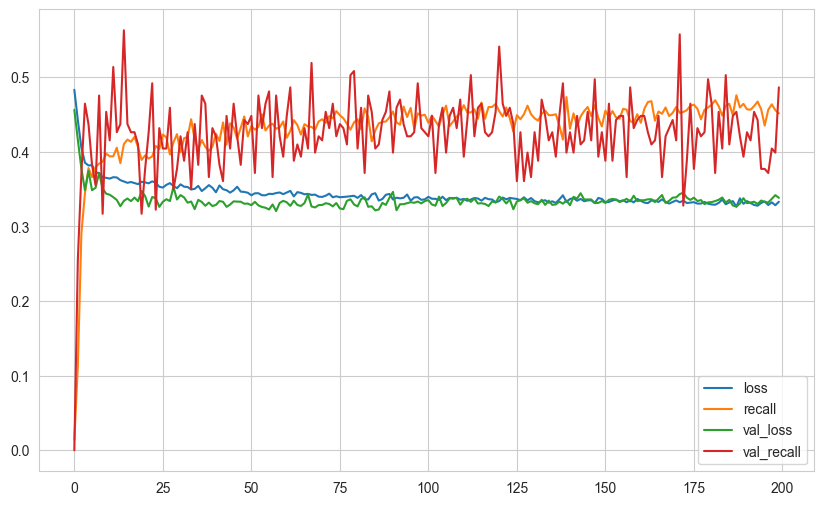

In [139]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [140]:
dropout_loss, dropout_recall = model.evaluate(x_test_trans, y_test, verbose=0)
print("loss: ", dropout_loss)
print("recall: ", dropout_recall)

loss:  0.33524754643440247
recall:  0.5245097875595093


In [141]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 2ms/step
[[759  37]
 [ 97 107]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       796
           1       0.74      0.52      0.61       204

    accuracy                           0.87      1000
   macro avg       0.81      0.74      0.77      1000
weighted avg       0.86      0.87      0.86      1000

Train Set
254/254 [==============================] - 0s 1ms/step
[[6178  272]
 [ 765  885]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      6450
           1       0.76      0.54      0.63      1650

    accuracy                           0.87      8100
   macro avg       0.83      0.75      0.78      8100
weighted avg       0.86      0.87      0.86      8100



32/32 [==============================] - 0s 1ms/step


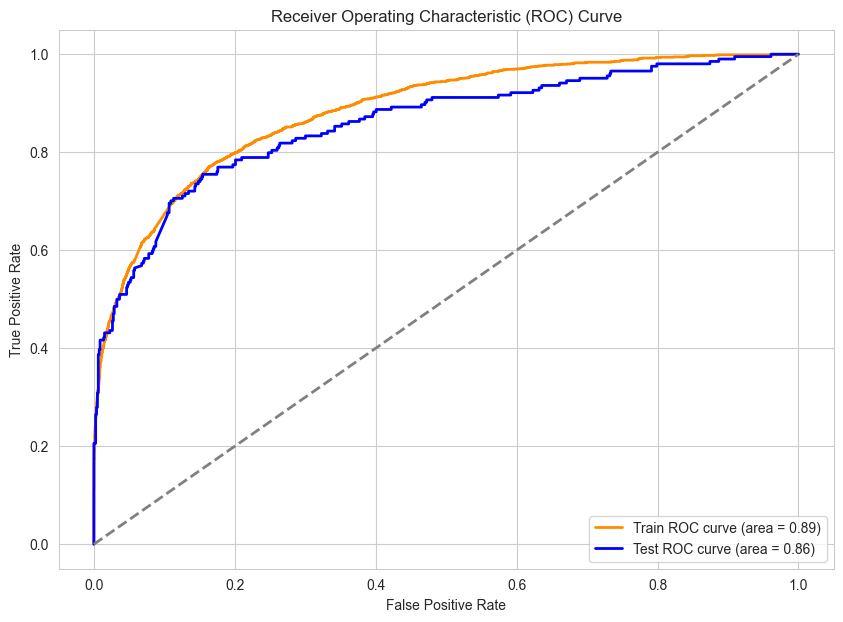

In [142]:
train_probs = model.predict(x_train_trans)
test_probs = model.predict(x_test_trans)

# Compute ROC curve and ROC area for both training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
dropout_roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
dropout_roc_auc_test = auc(fpr_test, tpr_test)

# Plotting
plt.figure(figsize=(10,7))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {dropout_roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC curve (area = {dropout_roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Add Early Stop

#### Monitor the "val_loss" as metric

In [143]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=x_train_trans.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [144]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True
)

In [145]:
model.fit(x=x_train_trans,
    y=y_train,
    validation_data=(x_val_trans,y_val),
    batch_size=64,
    epochs=200,
    verbose=1,
    callbacks=[early_stop],
    class_weight = { 0: 0.6, 1:2 })

Epoch 1/200
127/127 [==============================] - 1s 8ms/step - loss: 0.5833 - recall: 0.3848 - val_loss: 0.6116 - val_recall: 0.5464
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.5438 - recall: 0.5939 - val_loss: 0.5738 - val_recall: 0.5683
Epoch 3/200
127/127 [==============================] - 1s 5ms/step - loss: 0.5231 - recall: 0.6321 - val_loss: 0.5955 - val_recall: 0.6940
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.5109 - recall: 0.6364 - val_loss: 0.5261 - val_recall: 0.6120
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.5011 - recall: 0.6267 - val_loss: 0.6111 - val_recall: 0.7760
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4943 - recall: 0.6673 - val_loss: 0.5123 - val_recall: 0.6120
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4840 - recall: 0.6485 - val_loss: 0.5429 - val_recall: 0.7049
Epoch 8/200
127/127 [======

Epoch 58: early stopping


## Monitor the "val_loss" as metric gives a better result than drop out , but from the roc curve it seems we could get better results, lets try that !!

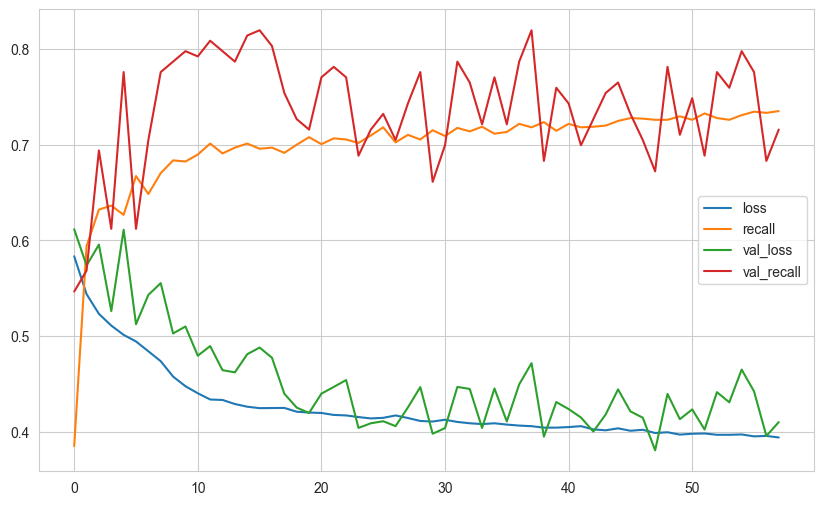

In [146]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [147]:
val_loss_loss, val_loss_recall = model.evaluate(x_test_trans, y_test, verbose=0)
print("loss: ", val_loss_loss)
print("recall: ", val_loss_recall)

loss:  0.37586745619773865
recall:  0.6029411554336548


In [148]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 2ms/step
[[719  77]
 [ 81 123]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       796
           1       0.61      0.60      0.61       204

    accuracy                           0.84      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.84      0.84      0.84      1000

Train Set
254/254 [==============================] - 0s 2ms/step
[[5718  732]
 [ 569 1081]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6450
           1       0.60      0.66      0.62      1650

    accuracy                           0.84      8100
   macro avg       0.75      0.77      0.76      8100
weighted avg       0.85      0.84      0.84      8100



32/32 [==============================] - 0s 1ms/step


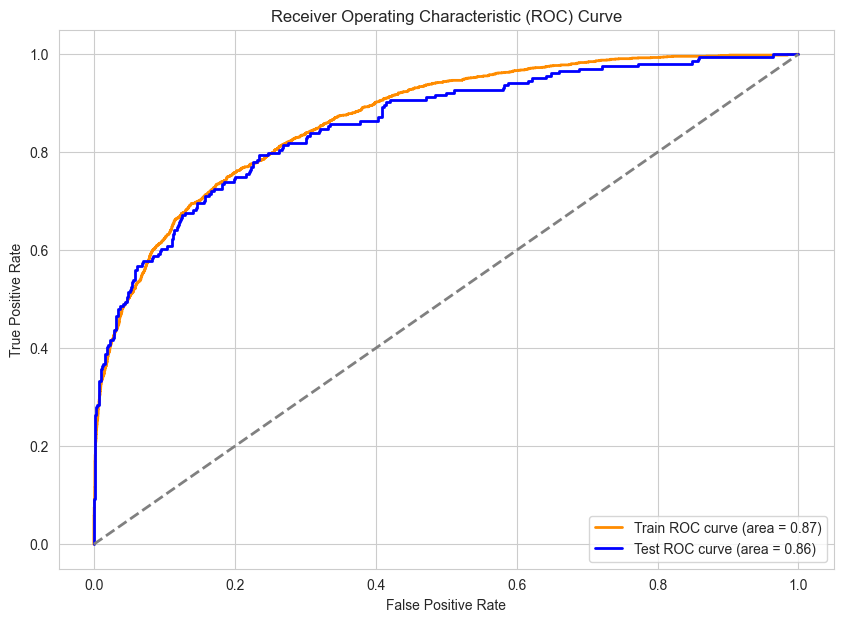

In [149]:
train_probs = model.predict(x_train_trans)
test_probs = model.predict(x_test_trans)

# Compute ROC curve and ROC area for both training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
val_loss_roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
val_loss_roc_auc_test = auc(fpr_test, tpr_test)

# Plotting
plt.figure(figsize=(10,7))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {val_loss_roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC curve (area = {val_loss_roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Finding Best Thresholds

## after tuning the threshold im getting a good result but not as much as the class weight

In [150]:
y_prob = model.predict(x_val_trans)
#fpr, tpr, thresholds_roc = roc_curve(y_val, y_prob)
#dict = {"precisions":fpr, "recalls":tpr, "threshold":thresholds_roc}
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_prob)
dict = {"precisions":precision[:-1], "recalls":recall[:-1], "threshold":thresholds_pr}
df_metric = pd.DataFrame(dict).sort_values(by = ["recalls", "precisions"], ascending=False)
df_metric

29/29 [==============================] - 0s 4ms/step


precisions  recalls  threshold
122       0.235    1.000      0.054
121       0.235    1.000      0.054
120       0.235    1.000      0.054
119       0.234    1.000      0.054
118       0.234    1.000      0.054
117       0.234    1.000      0.054
116       0.233    1.000      0.053
115       0.233    1.000      0.052
114       0.233    1.000      0.052
113       0.233    1.000      0.052
112       0.232    1.000      0.052
111       0.232    1.000      0.052
110       0.232    1.000      0.051
109       0.231    1.000      0.051
108       0.231    1.000      0.051
107       0.231    1.000      0.050
106       0.230    1.000      0.049
105       0.230    1.000      0.049
104       0.230    1.000      0.048
103       0.230    1.000      0.048
102       0.229    1.000      0.048
101       0.229    1.000      0.048
100       0.229    1.000      0.047
99        0.228    1.000      0.047
98        0.228    1.000      0.047
97        0.228    1.000      0.047
96        0.228    1.000      0.046
95        0.227    1.000      0.046
94        0.227    1.000      0.045
93        0.227    1.000      0.045
92        0.226    1.000      0.044
91        0.226    1.000      0.044
90        0.226    1.000      0.044
89        0.226    1.000      0.043
88        0.225    1.000      0.043
87        0.225    1.000      0.043
86        0.225    1.000      0.042
85        0.225    1.000      0.042
84        0.224    1.000      0.042
83        0.224    1.000      0.041
82        0.224    1.000      0.040
81        0.223    1.000      0.040
80        0.223    1.000      0.039
79        0.223    1.000      0.039
78        0.223    1.000      0.039
77        0.222    1.000      0.039
76        0.222    1.000      0.039
75        0.222    1.000      0.038
74        0.222    1.000      0.038
73        0.221    1.000      0.038
72        0.221    1.000      0.038
71        0.221    1.000      0.038
70        0.220    1.000      0.038
69        0.220    1.000      0.037
68        0.220    1.000      0.037
67        0.220    1.000      0.037
66        0.219    1.000      0.037
65        0.219    1.000      0.037
64        0.219    1.000      0.036
63        0.219    1.000      0.036
62        0.218    1.000      0.036
61        0.218    1.000      0.036
60        0.218    1.000      0.035
59        0.218    1.000      0.034
58        0.217    1.000      0.033
57        0.217    1.000      0.033
56        0.217    1.000      0.033
55        0.217    1.000      0.033
54        0.216    1.000      0.032
53        0.216    1.000      0.032
52        0.216    1.000      0.031
51        0.216    1.000      0.031
50        0.215    1.000      0.031
49        0.215    1.000      0.031
48        0.215    1.000      0.030
47        0.215    1.000      0.030
46        0.214    1.000      0.030
45        0.214    1.000      0.029
44        0.214    1.000      0.029
43        0.214    1.000      0.028
42        0.213    1.000      0.028
41        0.213    1.000      0.028
40        0.213    1.000      0.028
39        0.213    1.000      0.027
38        0.212    1.000      0.027
37        0.212    1.000      0.026
36        0.212    1.000      0.026
35        0.212    1.000      0.026
34        0.211    1.000      0.025
33        0.211    1.000      0.024
32        0.211    1.000      0.024
31        0.211    1.000      0.024
30        0.210    1.000      0.024
29        0.210    1.000      0.024
28        0.210    1.000      0.024
27        0.210    1.000      0.023
26        0.209    1.000      0.023
25        0.209    1.000      0.022
24        0.209    1.000      0.022
23        0.209    1.000      0.021
22        0.208    1.000      0.021
21        0.208    1.000      0.021
20        0.208    1.000      0.020
19        0.208    1.000      0.020
18        0.207    1.000      0.020
17        0.207    1.000      0.019
16        0.207    1.000      0.019
15        0.207    1.000      0.018
14        0.207    1.000      0.018
13        0.206    1.000      0.018
12       

In [152]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.30
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.30
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 3ms/step
[[591 205]
 [ 41 163]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       796
           1       0.44      0.80      0.57       204

    accuracy                           0.75      1000
   macro avg       0.69      0.77      0.70      1000
weighted avg       0.83      0.75      0.78      1000

Train Set
254/254 [==============================] - 0s 2ms/step
[[4654 1796]
 [ 292 1358]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      6450
           1       0.43      0.82      0.57      1650

    accuracy                           0.74      8100
   macro avg       0.69      0.77      0.69      8100
weighted avg       0.84      0.74      0.77      8100



#### Monitor the "val_recall" as metric

In [153]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=x_train_trans.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))



model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [154]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=10, restore_best_weights=True
)

In [155]:
model.fit(x=x_train_trans,
    y=y_train,
    validation_data=(x_val_trans,y_val),
    batch_size=64,
    epochs=200,
    verbose=1,
    callbacks=[early_stop],)

Epoch 1/200
127/127 [==============================] - 1s 8ms/step - loss: 0.5106 - recall: 0.0176 - val_loss: 0.4822 - val_recall: 0.0000e+00
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4665 - recall: 0.0000e+00 - val_loss: 0.4657 - val_recall: 0.0000e+00
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4511 - recall: 0.0036 - val_loss: 0.4489 - val_recall: 0.0383
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4376 - recall: 0.1030 - val_loss: 0.4358 - val_recall: 0.1421
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4258 - recall: 0.2152 - val_loss: 0.4315 - val_recall: 0.3005
Epoch 6/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4188 - recall: 0.2558 - val_loss: 0.4207 - val_recall: 0.1967
Epoch 7/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4111 - recall: 0.2673 - val_loss: 0.4145 - val_recall: 0.2678
Epoch 8/200
127

## Monitor the "val_loss" as metric gives better result than Monitor the "val_recall" as metric

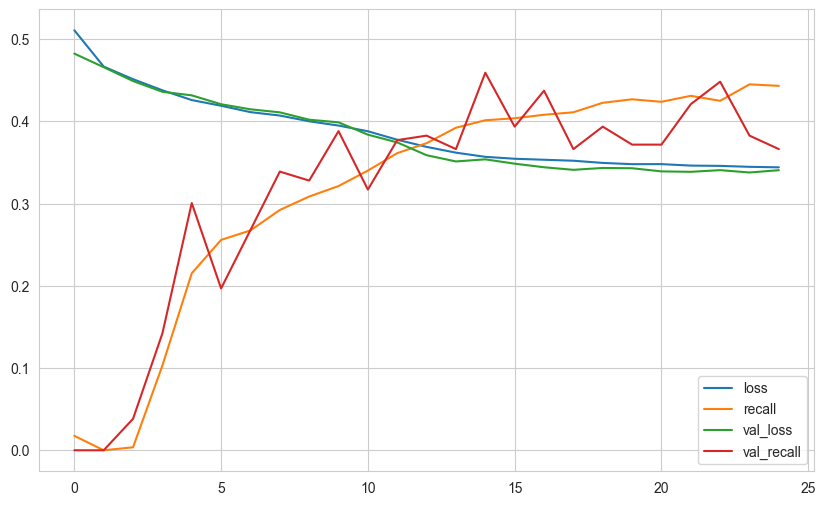

In [156]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [157]:
val_recall_loss, val_recall_recall = model.evaluate(x_test_trans, y_test, verbose=0)
print("loss: ", val_recall_loss)
print("recall: ", val_recall_recall)

loss:  0.35519492626190186
recall:  0.4950980246067047


In [158]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 2ms/step
[[759  37]
 [103 101]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.73      0.50      0.59       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000

Train Set
254/254 [==============================] - 0s 2ms/step
[[6095  355]
 [ 865  785]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6450
           1       0.69      0.48      0.56      1650

    accuracy                           0.85      8100
   macro avg       0.78      0.71      0.74      8100
weighted avg       0.84      0.85      0.84      8100



32/32 [==============================] - 0s 1ms/step


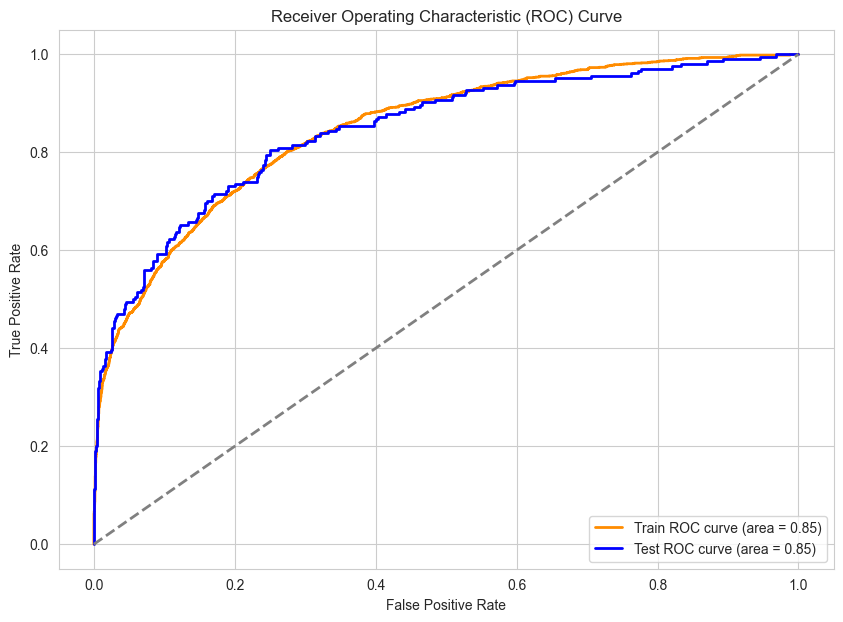

In [159]:
train_probs = model.predict(x_train_trans)
test_probs = model.predict(x_test_trans)

# Compute ROC curve and ROC area for both training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
val_recall_roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
val_recall_roc_auc_test = auc(fpr_test, tpr_test)

# Plotting
plt.figure(figsize=(10,7))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {val_recall_roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC curve (area = {val_recall_roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Optuna

In [161]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=10, restore_best_weights=True
)

In [176]:
trial_metric = ["Recall","Precision"]
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    n_units3 = trial.suggest_int("n_units3", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)
    
    model = Sequential()
    model.add(Dense(n_units1, input_dim=x_train_trans.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w1 = trial.suggest_float("w1", 0.01, 5, log = True)
    model.fit(
        x_train_trans,
        y_train,
        validation_data=(x_val_trans,y_val),
        batch_size=batch_size,
        epochs=200,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=1,
    )
    score_train = model.evaluate(x_val_trans, y_val, verbose=0)[1] #dont use test set(leakage) , use train or val
    return  score_train

In [177]:
study = optuna.create_study(direction= "maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 20:53:02,877] A new study created in memory with name: no-name-bddb834c-abf8-4ed4-bdd2-a147b5ead8c4


Epoch 1/200


C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'> which is of type type.
  warnings.warn(message)
C:\Users

127/127 [==============================] - 2s 12ms/step - loss: 0.1089 - recall: 1.0000 - precision: 0.2037 - val_loss: 1.2008 - val_recall: 1.0000 - val_precision: 0.2033
Epoch 2/200
127/127 [==============================] - 1s 9ms/step - loss: 0.0979 - recall: 1.0000 - precision: 0.2037 - val_loss: 1.3625 - val_recall: 1.0000 - val_precision: 0.2033
Epoch 3/200
127/127 [==============================] - 1s 9ms/step - loss: 0.0977 - recall: 1.0000 - precision: 0.2037 - val_loss: 1.3588 - val_recall: 1.0000 - val_precision: 0.2033
Epoch 4/200
127/127 [==============================] - 1s 7ms/step - loss: 0.0977 - recall: 1.0000 - precision: 0.2037 - val_loss: 1.2935 - val_recall: 1.0000 - val_precision: 0.2033
Epoch 5/200
127/127 [==============================] - 1s 8ms/step - loss: 0.0977 - recall: 1.0000 - precision: 0.2037 - val_loss: 1.3899 - val_recall: 1.0000 - val_precision: 0.2033
Epoch 6/200
127/127 [==============================] - 1s 11ms/step - loss: 0.0977 - recall: 1.0

[I 2023-10-30 20:53:16,497] Trial 0 finished with value: 1.0 and parameters: {'n_units1': 81, 'n_units2': 16, 'n_units3': 37, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.11634132639470007, 'w0': 0.0500921774028256, 'w1': 0.7339219314759953}. Best is trial 0 with value: 1.0.


Epoch 1/200
127/127 [==============================] - 2s 9ms/step - loss: 0.0268 - recall: 0.0097 - precision: 0.2857 - val_loss: 0.7112 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/200
127/127 [==============================] - 1s 10ms/step - loss: 0.0226 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.7422 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/200
127/127 [==============================] - 1s 10ms/step - loss: 0.0215 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6148 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/200
127/127 [==============================] - 1s 10ms/step - loss: 0.0212 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.5472 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/200
127/127 [==============================] - 1s 9ms/step - loss: 0.0210 - recall: 6.0606e-04 - precision: 0.3333 - val_loss: 0.5633 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 6/200
12

[I 2023-10-30 20:53:30,542] Trial 1 finished with value: 0.0 and parameters: {'n_units1': 63, 'n_units2': 59, 'n_units3': 59, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.12343317942592255, 'w0': 0.23052020752631175, 'w1': 0.024606183655037462}. Best is trial 0 with value: 1.0.


Epoch 1/200
127/127 [==============================] - 2s 6ms/step - loss: 0.0882 - recall: 0.2218 - precision: 0.2233 - val_loss: 0.6875 - val_recall: 0.2077 - val_precision: 0.2043
Epoch 2/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0882 - recall: 0.2315 - precision: 0.2203 - val_loss: 0.6878 - val_recall: 0.2295 - val_precision: 0.2079
Epoch 3/200
127/127 [==============================] - 0s 4ms/step - loss: 0.0881 - recall: 0.2461 - precision: 0.2195 - val_loss: 0.6881 - val_recall: 0.2514 - val_precision: 0.2150
Epoch 4/200
127/127 [==============================] - 0s 4ms/step - loss: 0.0881 - recall: 0.2558 - precision: 0.2154 - val_loss: 0.6884 - val_recall: 0.2951 - val_precision: 0.2308
Epoch 5/200
127/127 [==============================] - 0s 4ms/step - loss: 0.0881 - recall: 0.2764 - precision: 0.2192 - val_loss: 0.6887 - val_recall: 0.3115 - val_precision: 0.2308
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.0880 - r

127/127 [==============================] - 1s 5ms/step - loss: 0.0860 - recall: 0.9061 - precision: 0.2042 - val_loss: 0.7025 - val_recall: 0.9235 - val_precision: 0.2071
Epoch 46/200
127/127 [==============================] - 1s 6ms/step - loss: 0.0859 - recall: 0.9145 - precision: 0.2048 - val_loss: 0.7028 - val_recall: 0.9290 - val_precision: 0.2071
Epoch 47/200
127/127 [==============================] - 1s 5ms/step - loss: 0.0858 - recall: 0.9200 - precision: 0.2049 - val_loss: 0.7032 - val_recall: 0.9344 - val_precision: 0.2063
Epoch 48/200
127/127 [==============================] - 0s 4ms/step - loss: 0.0858 - recall: 0.9242 - precision: 0.2048 - val_loss: 0.7035 - val_recall: 0.9344 - val_precision: 0.2050
Epoch 49/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0857 - recall: 0.9303 - precision: 0.2051 - val_loss: 0.7039 - val_recall: 0.9399 - val_precision: 0.2057
Epoch 50/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0857 - recall: 

127/127 [==============================] - 0s 4ms/step - loss: 0.0837 - recall: 0.9970 - precision: 0.2035 - val_loss: 0.7187 - val_recall: 1.0000 - val_precision: 0.2038
Epoch 90/200
127/127 [==============================] - 0s 4ms/step - loss: 0.0836 - recall: 0.9976 - precision: 0.2036 - val_loss: 0.7191 - val_recall: 1.0000 - val_precision: 0.2038
Epoch 91/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0836 - recall: 0.9982 - precision: 0.2036 - val_loss: 0.7195 - val_recall: 1.0000 - val_precision: 0.2038
Epoch 92/200
127/127 [==============================] - 1s 5ms/step - loss: 0.0835 - recall: 0.9982 - precision: 0.2036 - val_loss: 0.7199 - val_recall: 1.0000 - val_precision: 0.2038
Epoch 93/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0834 - recall: 0.9994 - precision: 0.2038 - val_loss: 0.7203 - val_recall: 1.0000 - val_precision: 0.2038
Epoch 93: early stopping


[I 2023-10-30 20:54:25,852] Trial 2 finished with value: 1.0 and parameters: {'n_units1': 19, 'n_units2': 115, 'n_units3': 113, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0003375247415578816, 'w0': 0.02634650139609052, 'w1': 0.5161084763600791}. Best is trial 0 with value: 1.0.


Epoch 1/200
127/127 [==============================] - 2s 9ms/step - loss: 0.1298 - recall: 0.0200 - precision: 0.4342 - val_loss: 0.4326 - val_recall: 0.2623 - val_precision: 0.6400
Epoch 2/200
127/127 [==============================] - 1s 6ms/step - loss: 0.1162 - recall: 0.1248 - precision: 0.7574 - val_loss: 0.4244 - val_recall: 0.1366 - val_precision: 0.8621
Epoch 3/200
127/127 [==============================] - 1s 7ms/step - loss: 0.1084 - recall: 0.2152 - precision: 0.8142 - val_loss: 0.4108 - val_recall: 0.4863 - val_precision: 0.6403
Epoch 4/200
127/127 [==============================] - 1s 6ms/step - loss: 0.1051 - recall: 0.2436 - precision: 0.8171 - val_loss: 0.4022 - val_recall: 0.1913 - val_precision: 0.8974
Epoch 5/200
127/127 [==============================] - 1s 7ms/step - loss: 0.1035 - recall: 0.2436 - precision: 0.8255 - val_loss: 0.3703 - val_recall: 0.5137 - val_precision: 0.6438
Epoch 6/200
127/127 [==============================] - 1s 6ms/step - loss: 0.1007 - r

[I 2023-10-30 20:54:39,248] Trial 3 finished with value: 0.5136612057685852 and parameters: {'n_units1': 28, 'n_units2': 24, 'n_units3': 100, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.015372911295816855, 'w0': 0.46466693419072685, 'w1': 0.20590828278098217}. Best is trial 0 with value: 1.0.


Epoch 1/200
127/127 [==============================] - 1s 8ms/step - loss: 0.5267 - recall: 0.1982 - precision: 0.4606 - val_loss: 0.4484 - val_recall: 0.3934 - val_precision: 0.4932
Epoch 2/200
127/127 [==============================] - 1s 6ms/step - loss: 0.4663 - recall: 0.3703 - precision: 0.5886 - val_loss: 0.3773 - val_recall: 0.3279 - val_precision: 0.7407
Epoch 3/200
127/127 [==============================] - 1s 6ms/step - loss: 0.4280 - recall: 0.4497 - precision: 0.6299 - val_loss: 0.4103 - val_recall: 0.5956 - val_precision: 0.6193
Epoch 4/200
127/127 [==============================] - 1s 7ms/step - loss: 0.4214 - recall: 0.4600 - precision: 0.6521 - val_loss: 0.3695 - val_recall: 0.5191 - val_precision: 0.6690
Epoch 5/200
127/127 [==============================] - 1s 6ms/step - loss: 0.4128 - recall: 0.4776 - precision: 0.6747 - val_loss: 0.4139 - val_recall: 0.6503 - val_precision: 0.5920
Epoch 6/200
127/127 [==============================] - 1s 7ms/step - loss: 0.4052 - r

[I 2023-10-30 20:54:59,621] Trial 4 finished with value: 0.6557376980781555 and parameters: {'n_units1': 68, 'n_units2': 75, 'n_units3': 11, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.014219094980460508, 'w0': 0.8669528408991355, 'w1': 1.331528570497611}. Best is trial 0 with value: 1.0.


Epoch 1/200
127/127 [==============================] - 1s 6ms/step - loss: 0.0257 - recall: 0.7618 - precision: 0.2253 - val_loss: 0.6999 - val_recall: 0.7814 - val_precision: 0.2248
Epoch 2/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0257 - recall: 0.7612 - precision: 0.2261 - val_loss: 0.6998 - val_recall: 0.7760 - val_precision: 0.2250
Epoch 3/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0257 - recall: 0.7594 - precision: 0.2263 - val_loss: 0.6997 - val_recall: 0.7760 - val_precision: 0.2258
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.0257 - recall: 0.7576 - precision: 0.2269 - val_loss: 0.6996 - val_recall: 0.7760 - val_precision: 0.2268
Epoch 5/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0257 - recall: 0.7558 - precision: 0.2271 - val_loss: 0.6995 - val_recall: 0.7760 - val_precision: 0.2276
Epoch 6/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0257 - r

[I 2023-10-30 20:55:06,443] Trial 5 finished with value: 0.7814207673072815 and parameters: {'n_units1': 112, 'n_units2': 61, 'n_units3': 100, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 6.592235674619146e-05, 'w0': 0.04215283298939103, 'w1': 0.014409844427855083}. Best is trial 0 with value: 1.0.


Epoch 1/200
127/127 [==============================] - 1s 6ms/step - loss: 0.0477 - recall: 0.8255 - precision: 0.1989 - val_loss: 0.7153 - val_recall: 0.7760 - val_precision: 0.1967
Epoch 2/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0472 - recall: 0.7406 - precision: 0.1989 - val_loss: 0.7100 - val_recall: 0.7322 - val_precision: 0.2012
Epoch 3/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0467 - recall: 0.6782 - precision: 0.1964 - val_loss: 0.7049 - val_recall: 0.6667 - val_precision: 0.1933
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.0462 - recall: 0.6339 - precision: 0.1951 - val_loss: 0.7000 - val_recall: 0.5738 - val_precision: 0.1839
Epoch 5/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0457 - recall: 0.5636 - precision: 0.1997 - val_loss: 0.6954 - val_recall: 0.5191 - val_precision: 0.2030
Epoch 6/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0452 - r

[I 2023-10-30 20:55:13,181] Trial 6 finished with value: 0.7759562730789185 and parameters: {'n_units1': 31, 'n_units2': 127, 'n_units3': 11, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.003070613049970217, 'w0': 0.07862624046127614, 'w1': 0.013405769048645298}. Best is trial 0 with value: 1.0.


Epoch 1/200
127/127 [==============================] - 1s 7ms/step - loss: 0.2994 - recall: 0.8945 - precision: 0.2066 - val_loss: 0.7106 - val_recall: 0.8415 - val_precision: 0.2073
Epoch 2/200
127/127 [==============================] - 1s 4ms/step - loss: 0.2887 - recall: 0.7164 - precision: 0.2049 - val_loss: 0.6933 - val_recall: 0.5410 - val_precision: 0.2033
Epoch 3/200
127/127 [==============================] - 1s 4ms/step - loss: 0.2779 - recall: 0.3200 - precision: 0.1814 - val_loss: 0.6760 - val_recall: 0.1694 - val_precision: 0.1685
Epoch 4/200
127/127 [==============================] - 1s 4ms/step - loss: 0.2668 - recall: 0.0994 - precision: 0.1657 - val_loss: 0.6584 - val_recall: 0.0492 - val_precision: 0.1343
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2552 - recall: 0.0236 - precision: 0.1512 - val_loss: 0.6401 - val_recall: 0.0055 - val_precision: 0.1000
Epoch 6/200
127/127 [==============================] - 1s 4ms/step - loss: 0.2428 - r

[I 2023-10-30 20:55:20,024] Trial 7 finished with value: 0.8415300250053406 and parameters: {'n_units1': 110, 'n_units2': 87, 'n_units3': 28, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0032914906944153974, 'w0': 0.48971637007610375, 'w1': 0.09018034131463448}. Best is trial 0 with value: 1.0.


Epoch 1/200
127/127 [==============================] - 2s 11ms/step - loss: 0.2076 - recall: 0.9661 - precision: 0.2191 - val_loss: 0.9111 - val_recall: 0.9290 - val_precision: 0.2429
Epoch 2/200
127/127 [==============================] - 1s 9ms/step - loss: 0.1835 - recall: 0.9442 - precision: 0.2572 - val_loss: 0.9263 - val_recall: 0.9344 - val_precision: 0.2545
Epoch 3/200
127/127 [==============================] - 1s 9ms/step - loss: 0.1679 - recall: 0.9279 - precision: 0.2925 - val_loss: 0.9144 - val_recall: 0.9563 - val_precision: 0.2620
Epoch 4/200
127/127 [==============================] - 1s 9ms/step - loss: 0.1615 - recall: 0.9188 - precision: 0.3089 - val_loss: 0.8945 - val_recall: 0.9508 - val_precision: 0.2802
Epoch 5/200
127/127 [==============================] - 1s 9ms/step - loss: 0.1588 - recall: 0.9224 - precision: 0.3166 - val_loss: 0.8974 - val_recall: 0.9617 - val_precision: 0.2798
Epoch 6/200
127/127 [==============================] - 1s 10ms/step - loss: 0.1570 -

[I 2023-10-30 20:55:38,358] Trial 8 finished with value: 0.9617486596107483 and parameters: {'n_units1': 38, 'n_units2': 65, 'n_units3': 87, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.001226045292193792, 'w0': 0.12565745851561522, 'w1': 1.386200269724136}. Best is trial 0 with value: 1.0.


Epoch 1/200
127/127 [==============================] - 1s 7ms/step - loss: 0.0269 - recall: 0.0339 - precision: 0.1886 - val_loss: 0.5565 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0204 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.5392 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0195 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.5002 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/200
127/127 [==============================] - 1s 4ms/step - loss: 0.0189 - recall: 0.0030 - precision: 1.0000 - val_loss: 0.4921 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.0185 - recall: 0.0248 - precision: 0.8723 - val_loss: 0.4453 - val_recall: 0.0492 - val_precision: 0.7500
Epoch 6/200
127/127 [================

[I 2023-10-30 20:55:57,977] Trial 9 finished with value: 0.3169398903846741 and parameters: {'n_units1': 45, 'n_units2': 52, 'n_units3': 66, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.000683221054488878, 'w0': 0.08774931764437782, 'w1': 0.03131312854098322}. Best is trial 0 with value: 1.0.


{'n_units1': 81,
 'n_units2': 16,
 'n_units3': 37,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam,
 'learning_rate': 0.11634132639470007,
 'w0': 0.0500921774028256,
 'w1': 0.7339219314759953}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [182]:
# build model with optuna parameters
unit1, unit2,unit3, optimizer, lr,  w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w1"],
)
model = Sequential()
model.add(Dense(unit1, input_dim=x_train_trans.shape[1] ,activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    x_train_trans,
    y_train,
    validation_data=(x_val_trans,y_val),
    batch_size=64,
    epochs=200,
    callbacks=[early_stop],
    class_weight= {0:1, 1:w1},
    verbose=1,
)

Epoch 1/200
127/127 [==============================] - 2s 13ms/step - loss: 0.4213 - recall: 0.0224 - val_loss: 0.4928 - val_recall: 0.0000e+00
Epoch 2/200
127/127 [==============================] - 1s 9ms/step - loss: 0.3675 - recall: 0.0055 - val_loss: 0.4414 - val_recall: 0.0000e+00
Epoch 3/200
127/127 [==============================] - 1s 8ms/step - loss: 0.3418 - recall: 0.1412 - val_loss: 0.3815 - val_recall: 0.0000e+00
Epoch 4/200
127/127 [==============================] - 1s 8ms/step - loss: 0.3293 - recall: 0.3406 - val_loss: 0.3698 - val_recall: 0.3661
Epoch 5/200
127/127 [==============================] - 1s 9ms/step - loss: 0.3273 - recall: 0.3097 - val_loss: 0.4057 - val_recall: 0.4754
Epoch 6/200
127/127 [==============================] - 1s 9ms/step - loss: 0.3234 - recall: 0.3570 - val_loss: 0.4430 - val_recall: 0.1913
Epoch 7/200
127/127 [==============================] - 1s 9ms/step - loss: 0.3237 - recall: 0.2982 - val_loss: 0.4181 - val_recall: 0.2896
Epoch 8/200
12

## im getting good results with optuna without assign weight to class 0 otherwise the model will learn nothing for class 0 

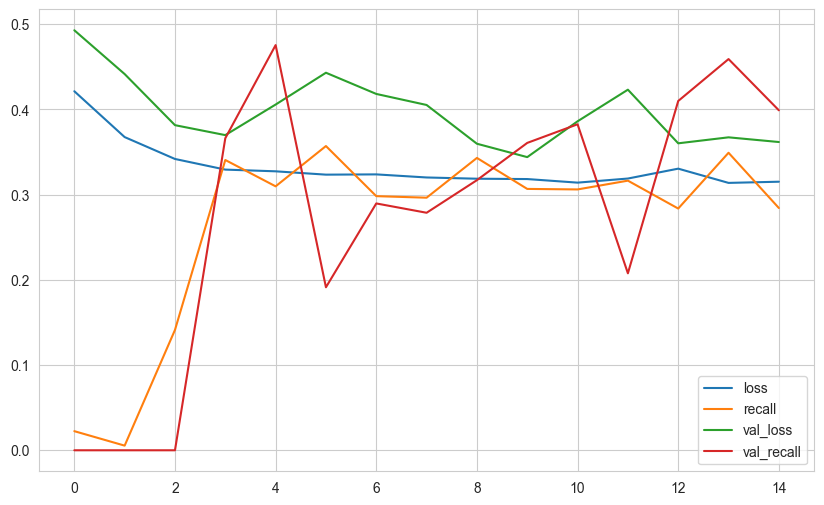

In [183]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [184]:
optuna_loss, optuna_recall = model.evaluate(x_test_trans, y_test, verbose=0)
print("loss: ", optuna_loss)
print("recall: ", optuna_recall)

loss:  0.40632712841033936
recall:  0.4901960790157318


In [185]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 2ms/step
[[734  62]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       796
           1       0.62      0.49      0.55       204

    accuracy                           0.83      1000
   macro avg       0.75      0.71      0.72      1000
weighted avg       0.82      0.83      0.83      1000

Train Set
254/254 [==============================] - 0s 2ms/step
[[5937  513]
 [ 907  743]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6450
           1       0.59      0.45      0.51      1650

    accuracy                           0.82      8100
   macro avg       0.73      0.69      0.70      8100
weighted avg       0.81      0.82      0.82      8100



# OverSample

In [186]:
from imblearn.combine import SMOTEENN

In [187]:
smote = SMOTEENN()
x_train_over, y_train_over = smote.fit_resample(x_train_trans,y_train)

In [188]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=x_train_over.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [189]:
model.fit(x=x_train_over,
    y=y_train_over,
    validation_data=(x_val_trans,y_val),
    batch_size=64,
    epochs=200,
    verbose=1,
    callbacks=[early_stop],)

Epoch 1/200
149/149 [==============================] - 1s 7ms/step - loss: 0.6700 - recall: 0.4902 - val_loss: 0.6523 - val_recall: 0.6721
Epoch 2/200
149/149 [==============================] - 1s 5ms/step - loss: 0.5393 - recall: 0.8099 - val_loss: 0.7112 - val_recall: 0.7650
Epoch 3/200
149/149 [==============================] - 1s 4ms/step - loss: 0.4657 - recall: 0.8415 - val_loss: 0.6568 - val_recall: 0.7760
Epoch 4/200
149/149 [==============================] - 1s 4ms/step - loss: 0.4214 - recall: 0.8494 - val_loss: 0.6513 - val_recall: 0.8033
Epoch 5/200
149/149 [==============================] - 1s 4ms/step - loss: 0.3859 - recall: 0.8633 - val_loss: 0.7373 - val_recall: 0.8197
Epoch 6/200
149/149 [==============================] - 1s 4ms/step - loss: 0.3638 - recall: 0.8711 - val_loss: 0.7588 - val_recall: 0.8361
Epoch 7/200
149/149 [==============================] - 1s 4ms/step - loss: 0.3514 - recall: 0.8880 - val_loss: 0.5773 - val_recall: 0.7923
Epoch 8/200
149/149 [======

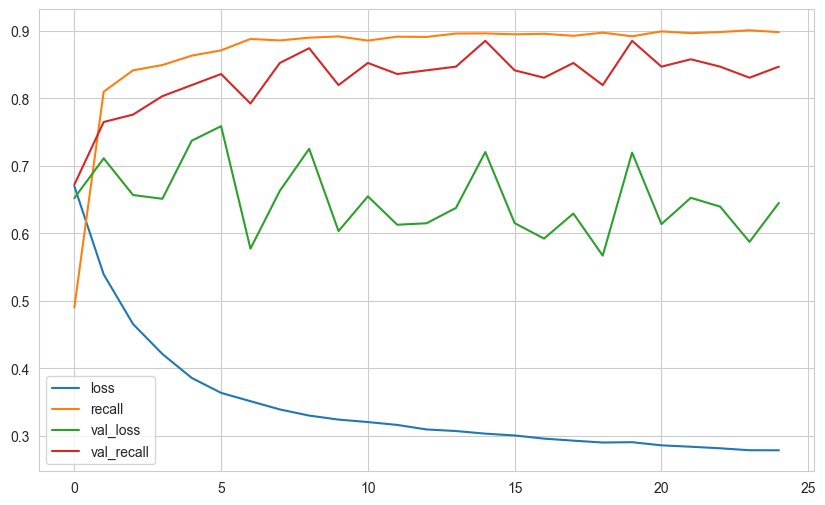

In [190]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

## im getting very good result after oversampling , but after all oversample uses synthsis values, so it would be better if we try to get good result without oversample the data 

In [191]:
over_loss, over_recall = model.evaluate(x_test_trans, y_test, verbose=0)
print("loss: ", over_loss)
print("recall: ", over_recall)

loss:  0.7061131000518799
recall:  0.8627451062202454


In [192]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 3ms/step
[[503 293]
 [ 28 176]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76       796
           1       0.38      0.86      0.52       204

    accuracy                           0.68      1000
   macro avg       0.66      0.75      0.64      1000
weighted avg       0.83      0.68      0.71      1000

Train Set
254/254 [==============================] - 0s 2ms/step
[[4098 2352]
 [ 206 1444]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.76      6450
           1       0.38      0.88      0.53      1650

    accuracy                           0.68      8100
   macro avg       0.67      0.76      0.65      8100
weighted avg       0.84      0.68      0.71      8100



32/32 [==============================] - 0s 2ms/step


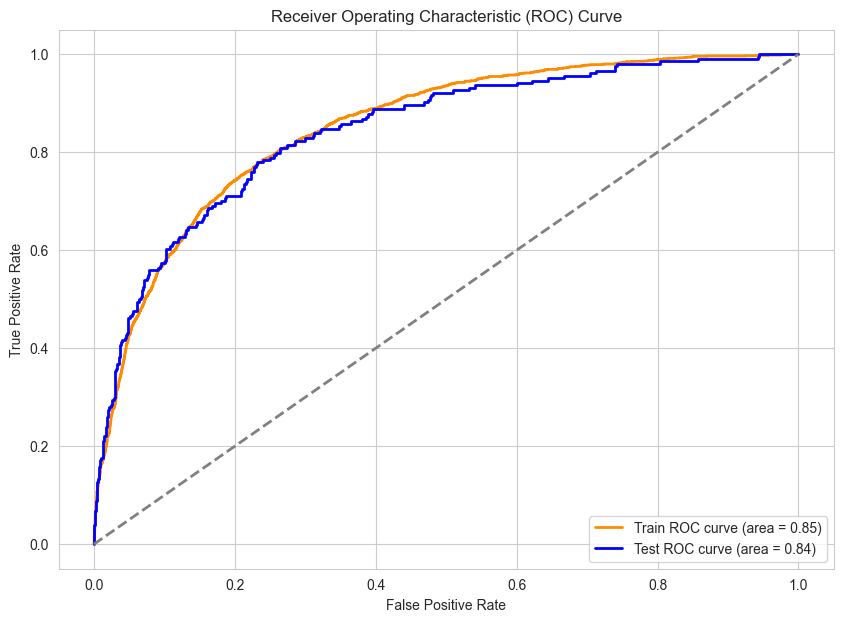

In [193]:
train_probs = model.predict(x_train_trans)
test_probs = model.predict(x_test_trans)

# Compute ROC curve and ROC area for both training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
over_roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
over_roc_auc_test = auc(fpr_test, tpr_test)

# Plotting
plt.figure(figsize=(10,7))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {over_roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC curve (area = {over_roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compare Models

# I choose the weighted model after tuning the threshold because it has the best recall score

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20328\2322672325.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")


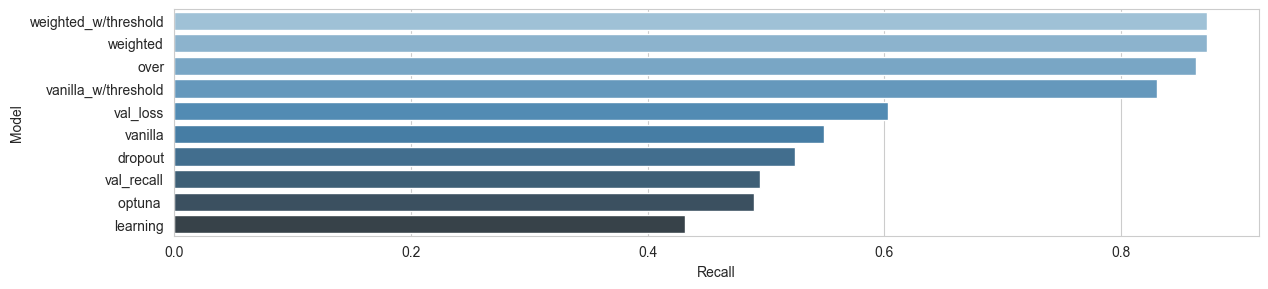

In [194]:
compare = pd.DataFrame(
    {
        "Model": ["vanilla_w/threshold","weighted_w/threshold","over","vanilla", "optuna ","val_recall" ,"val_loss", "dropout", "learning","weighted"],
        "Recall": [vanilla_recall_thre,weighted_recall_thre,over_recall,vanilla_recall, optuna_recall, val_recall_recall, val_loss_recall, dropout_recall, learning_recall, weighted_recall ]
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")


plt.show();

# Final Model and Model Deployment

In [195]:
import pickle

pickle.dump(column_trans, open("column_trans_DL", "wb"))

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1 , stratify=y, random_state=49)

In [197]:
x_train_trans = column_trans.fit_transform(x_train)
x_test_trans = column_trans.transform(x_test)

In [198]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=x_train_trans.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [200]:
model.fit(x=x_train_trans,
    y=y_train,
    validation_data=(x_test_trans,y_test),
    batch_size=64,
    epochs=200,
    verbose=1,
    class_weight = class_weights,
    callbacks=[early_stop])

Epoch 1/200
141/141 [==============================] - 1s 5ms/step - loss: 0.6671 - recall: 0.4490 - val_loss: 0.6520 - val_recall: 0.5294
Epoch 2/200
141/141 [==============================] - 1s 4ms/step - loss: 0.6427 - recall: 0.6110 - val_loss: 0.6142 - val_recall: 0.5294
Epoch 3/200
141/141 [==============================] - 1s 4ms/step - loss: 0.6263 - recall: 0.6541 - val_loss: 0.6277 - val_recall: 0.6127
Epoch 4/200
141/141 [==============================] - 1s 4ms/step - loss: 0.6129 - recall: 0.6661 - val_loss: 0.5991 - val_recall: 0.5735
Epoch 5/200
141/141 [==============================] - 1s 4ms/step - loss: 0.5998 - recall: 0.6776 - val_loss: 0.6040 - val_recall: 0.6078
Epoch 6/200
141/141 [==============================] - 1s 4ms/step - loss: 0.5890 - recall: 0.6967 - val_loss: 0.6125 - val_recall: 0.6471
Epoch 7/200
141/141 [==============================] - 1s 4ms/step - loss: 0.5803 - recall: 0.7005 - val_loss: 0.6197 - val_recall: 0.6667
Epoch 8/200
141/141 [======

In [206]:
print("Test Set")
y_pred = model.predict(x_test_trans) > 0.40
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Set")
y_pred = model.predict(x_train_trans) > 0.40
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Test Set
32/32 [==============================] - 0s 1ms/step
[[490 306]
 [ 24 180]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       796
           1       0.37      0.88      0.52       204

    accuracy                           0.67      1000
   macro avg       0.66      0.75      0.63      1000
weighted avg       0.83      0.67      0.70      1000

Train Set
282/282 [==============================] - 0s 778us/step
[[4412 2755]
 [ 211 1622]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75      7167
           1       0.37      0.88      0.52      1833

    accuracy                           0.67      9000
   macro avg       0.66      0.75      0.64      9000
weighted avg       0.84      0.67      0.70      9000



In [202]:
model.save("model_Churn.h5")

## Prediction

In [203]:
from tensorflow.keras.models import load_model

In [204]:
model_churn = load_model("model_Churn.h5")
col_trans = pickle.load(open("column_trans_DL", "rb"))

In [205]:
y_pred = model.predict(x_test_trans) > 0.40
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[490 306]
 [ 24 180]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       796
           1       0.37      0.88      0.52       204

    accuracy                           0.67      1000
   macro avg       0.66      0.75      0.63      1000
weighted avg       0.83      0.67      0.70      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___